In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore,boxcox
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import time

In [2]:
micro=pd.read_csv("C://Users//ABHISHEK//CSV\micro_credit.csv")
micro.head(7)

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   
5           6      1  35819I70783  568.0   2257.362667   2261.460000   
6           7      1  96759I84459  545.0   2876.641667   2883.970000   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   
5    368.13    380.13                2.0                0.0              1539   
6    335.75    402.90               13.0                0.0              5787   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   
5              4          10.0             6156.0                1539.0   
6              1           0.0             5787.0                5787.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   
5                 15.40              8             0              11744   
6                277.80              1             0               5787   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   
5                1539.0                 55.90            0.0           0.0   
6                5787.0                277.80            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   
5              0             0            3            18              6.0   
6              0             0            1             6              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12 

## QUANTITATIVE EDA

In [3]:
print('Shape of the dataset - ',micro.shape)
print('\nColumns in the dataset-\n\n',micro.columns.values)

Shape of the dataset -  (209593, 37)

Columns in the dataset-

 ['Unnamed: 0' 'label' 'msisdn' 'aon' 'daily_decr30' 'daily_decr90'
 'rental30' 'rental90' 'last_rech_date_ma' 'last_rech_date_da'
 'last_rech_amt_ma' 'cnt_ma_rech30' 'fr_ma_rech30' 'sumamnt_ma_rech30'
 'medianamnt_ma_rech30' 'medianmarechprebal30' 'cnt_ma_rech90'
 'fr_ma_rech90' 'sumamnt_ma_rech90' 'medianamnt_ma_rech90'
 'medianmarechprebal90' 'cnt_da_rech30' 'fr_da_rech30' 'cnt_da_rech90'
 'fr_da_rech90' 'cnt_loans30' 'amnt_loans30' 'maxamnt_loans30'
 'medianamnt_loans30' 'cnt_loans90' 'amnt_loans90' 'maxamnt_loans90'
 'medianamnt_loans90' 'payback30' 'payback90' 'pcircle' 'pdate']


In [4]:
print('Number of duplicated values:-',micro.duplicated().sum())

Number of duplicated values:- 0


*`Dropping columns named 'Unnamed 0', 'msisdn'  as there is no need of customer's mobile number and a extra column to denote serial numbers.`*

In [5]:
micro.drop(['Unnamed: 0', 'msisdn','pdate'],axis=1,inplace=True)

In [6]:
micro.shape

(209593, 34)

**Checking For Null Values and Datatypes**

In [7]:
for i in micro.columns:
    null=micro[i].isnull().sum()
    if null>0:
        print('Number of Null Values At Column ',i ,'==  ',null )
    else:
        print('There are no null values in column-',i)

There are no null values in column- label
There are no null values in column- aon
There are no null values in column- daily_decr30
There are no null values in column- daily_decr90
There are no null values in column- rental30
There are no null values in column- rental90
There are no null values in column- last_rech_date_ma
There are no null values in column- last_rech_date_da
There are no null values in column- last_rech_amt_ma
There are no null values in column- cnt_ma_rech30
There are no null values in column- fr_ma_rech30
There are no null values in column- sumamnt_ma_rech30
There are no null values in column- medianamnt_ma_rech30
There are no null values in column- medianmarechprebal30
There are no null values in column- cnt_ma_rech90
There are no null values in column- fr_ma_rech90
There are no null values in column- sumamnt_ma_rech90
There are no null values in column- medianamnt_ma_rech90
There are no null values in column- medianmarechprebal90
There are no null values in column-

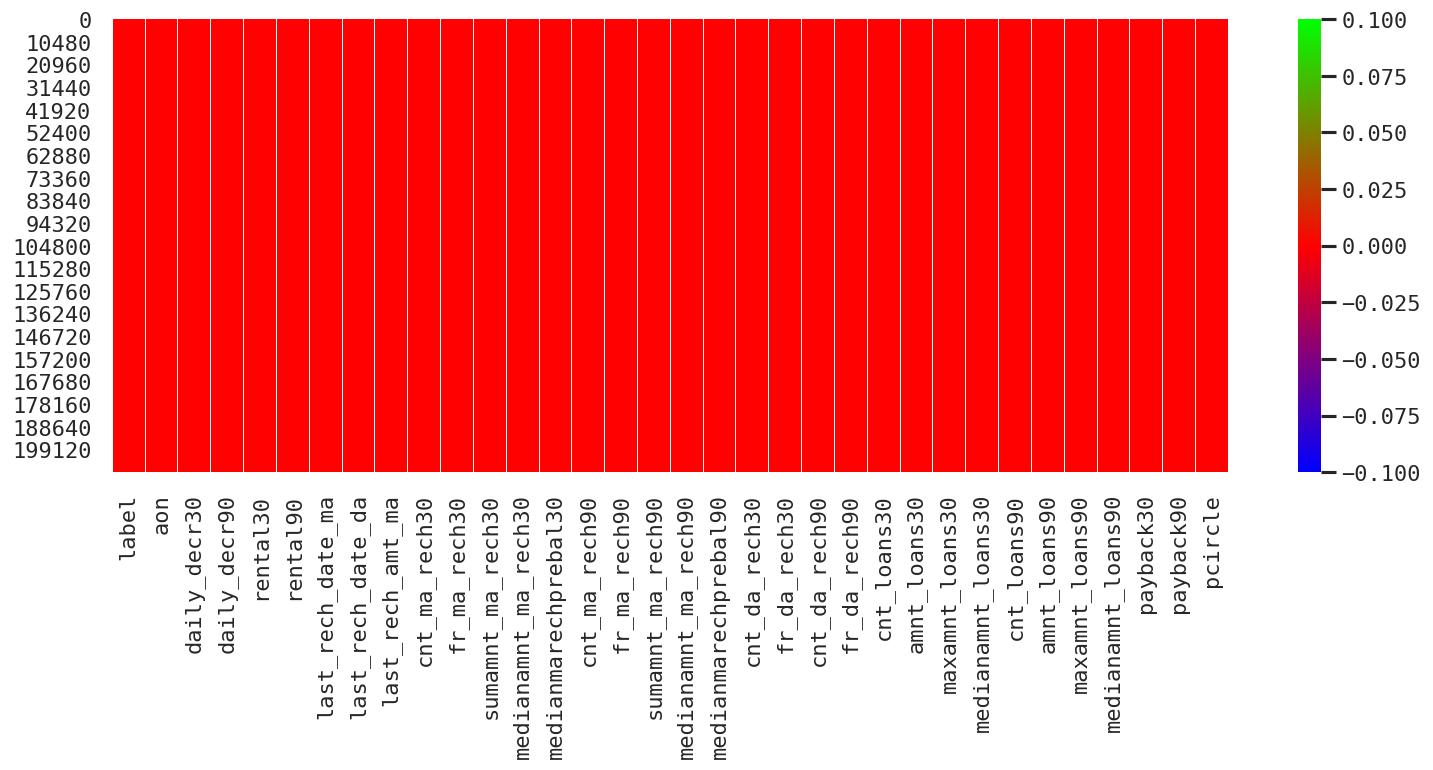

In [8]:
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.figure(figsize=(15,5),dpi=120)
sns.heatmap(micro.isnull(),cmap='brg')
plt.show()

In [9]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

*`Changing the datatypes of Columns named '"last_rech_date_ma, last_rech_date_da, fr_ma_rech30, cnt_da_rech30, fr_da_rech30, cnt_loans90, payback3, payback90" from float64 to int64 as they represents the number of repititions or frequency of recharge in terms of number of days / time period so they must be in int64 format`*

In [10]:
micro.last_rech_date_ma=micro.last_rech_date_ma.astype('int64')
micro.last_rech_date_da=micro.last_rech_date_da.astype('int64')
micro.fr_ma_rech30=micro.fr_ma_rech30.astype('int64')
micro.cnt_da_rech30=micro.cnt_da_rech30.astype('int64')
micro.fr_da_rech30=micro.fr_da_rech30.astype('int64')
micro.cnt_loans90=micro.cnt_loans90.astype('int64')
micro.payback30=micro.payback30.astype('int64')             
micro.payback90=micro.payback90.astype('int64')

***Checking the number of unique values in 'pcircle' column***

In [11]:
print("Number of unique values in PCIRCLE column:-", micro.pcircle.nunique())

Number of unique values in PCIRCLE column:- 1


*`as there is only one unique value in the pcircle column it is good to drop`*

In [12]:
micro.drop(['pcircle'],axis=1,inplace=True)

In [13]:
micro.groupby(['label']).mean()

aon  daily_decr30  daily_decr90     rental30     rental90  \
label                                                                      
0      8870.998799   1272.376756   1278.817736  2029.914812  2329.486376   
1      8004.139590   5967.455497   6767.646423  2787.095360  3647.985363   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
label                                                                          
0            3223.691881        3470.378488       1237.045830       1.303417   
1            3831.744176        3746.690396       2182.462408       4.359530   

       fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
label                                                          
0       3548.408111        2258.849629           1036.967185   
1       3764.300996        8481.191767           1923.474317   

       medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
label                                                                         
0               4542.476553       1.812744      4.903601        3210.102783   
1               3753.437868       6.957630      8.118012       13706.395778   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
label                                                              
0               1198.435135             53.604368     220.175331   
1               1959.607547             97.505394     268.622970   

       fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
label                                                                         
0       3753.276317       0.038338      0.059361     1.431313      8.873634   
1       3748.952205       0.041945      0.043766     2.948340     19.246834   

       maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
label                                                                   
0           271.873754            0.028285    15.701208      9.642382   
1           275.055959            0.057700    18.920264     25.642590   

       maxamnt_loans90  medianamnt_loans90  payback30  payback90  
label                                                             
0             6.234386            0.027081   2.227276   2.926038  
1             6.769990            0.048787   3.375558   4.297736

In [14]:
micro.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.845343        3712.200350   
std      4308.586781    5770.461279       53905.858216       53374.797848   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.000000      999171.000000   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.352626        7704.501157   
std         2370.786034       4.256090   53643.590642       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.000000      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.575597    3749.491953       0.041495   
std              369.215658    4183.866730   53885.380285       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.000000  999809.000000      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

`from the above describe function it is clear that this dataset has lot of outliers and unrealistics values so removing those erroneous data.`

*`The columns 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_date_da',  'medianmarechprebal30', 'cnt_ma_rech90','medianmarechprebal90' have negative values which is impossible as they represents factors like number of days,amount of money so removing those values which are less than 0`*

In [15]:
mfi=micro.copy()

In [16]:
mfi.drop(mfi.index[mfi['aon']<0], inplace = True)
mfi.drop(mfi.index[mfi['daily_decr30']<0], inplace = True)
mfi.drop(mfi.index[mfi['daily_decr90']<0], inplace = True)
mfi.drop(mfi.index[mfi['rental30']<0], inplace = True)
mfi.drop(mfi.index[mfi['rental90']<0], inplace = True)
mfi.drop(mfi.index[mfi['last_rech_date_ma']<0], inplace = True)
mfi.drop(mfi.index[mfi['last_rech_date_da']<0], inplace = True)
mfi.drop(mfi.index[mfi['medianmarechprebal30']<0], inplace = True)
mfi.drop(mfi.index[mfi['cnt_ma_rech90']<0], inplace = True)
mfi.drop(mfi.index[mfi['medianmarechprebal90']<0], inplace = True)

*`999860.75 days or 2739.34 year on cellular network is impossible so removing any data where aon is greater than 7300 days or 20 years.`*

In [17]:
mfi.drop(mfi.index[mfi['aon']>7301], inplace = True) 

In [18]:
mfi.groupby(['label']).mean()

aon  daily_decr30  daily_decr90     rental30     rental90  \
label                                                                     
0      552.468612   1361.260376   1367.952660  2151.763593  2479.726455   
1      670.646619   6199.828511   7037.943418  2916.294953  3818.665142   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
label                                                                          
0            3274.228648        3671.698257       1252.967355       1.369852   
1            3900.427792        3788.381393       2117.417710       4.445257   

       fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
label                                                          
0       3766.223793        2323.757218           1051.590870   
1       3789.677706        8428.119295           1864.519505   

       medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
label                                                                         
0               4414.876551       1.909824      5.164528        3302.794676   
1               3745.981716       7.133649      7.987173       13777.509145   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
label                                                              
0               1211.756265             58.294035     220.117532   
1               1894.769620             97.158082     271.023914   

       fr_da_rech30  cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  \
label                                                                         
0       3846.909954       0.041706      0.064294     1.462542      9.082459   
1       3716.244284       0.042981      0.043973     2.997980     19.610197   

       maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
label                                                                   
0           273.294146            0.028418    15.526966      9.917975   
1           275.787571            0.057337    18.924701     26.279406   

       maxamnt_loans90  medianamnt_loans90  payback30  payback90  
label                                                             
0             6.250238            0.027074   2.375878   3.118226  
1             6.798795            0.048080   3.429324   4.383761

## GRAPHICAL EDA

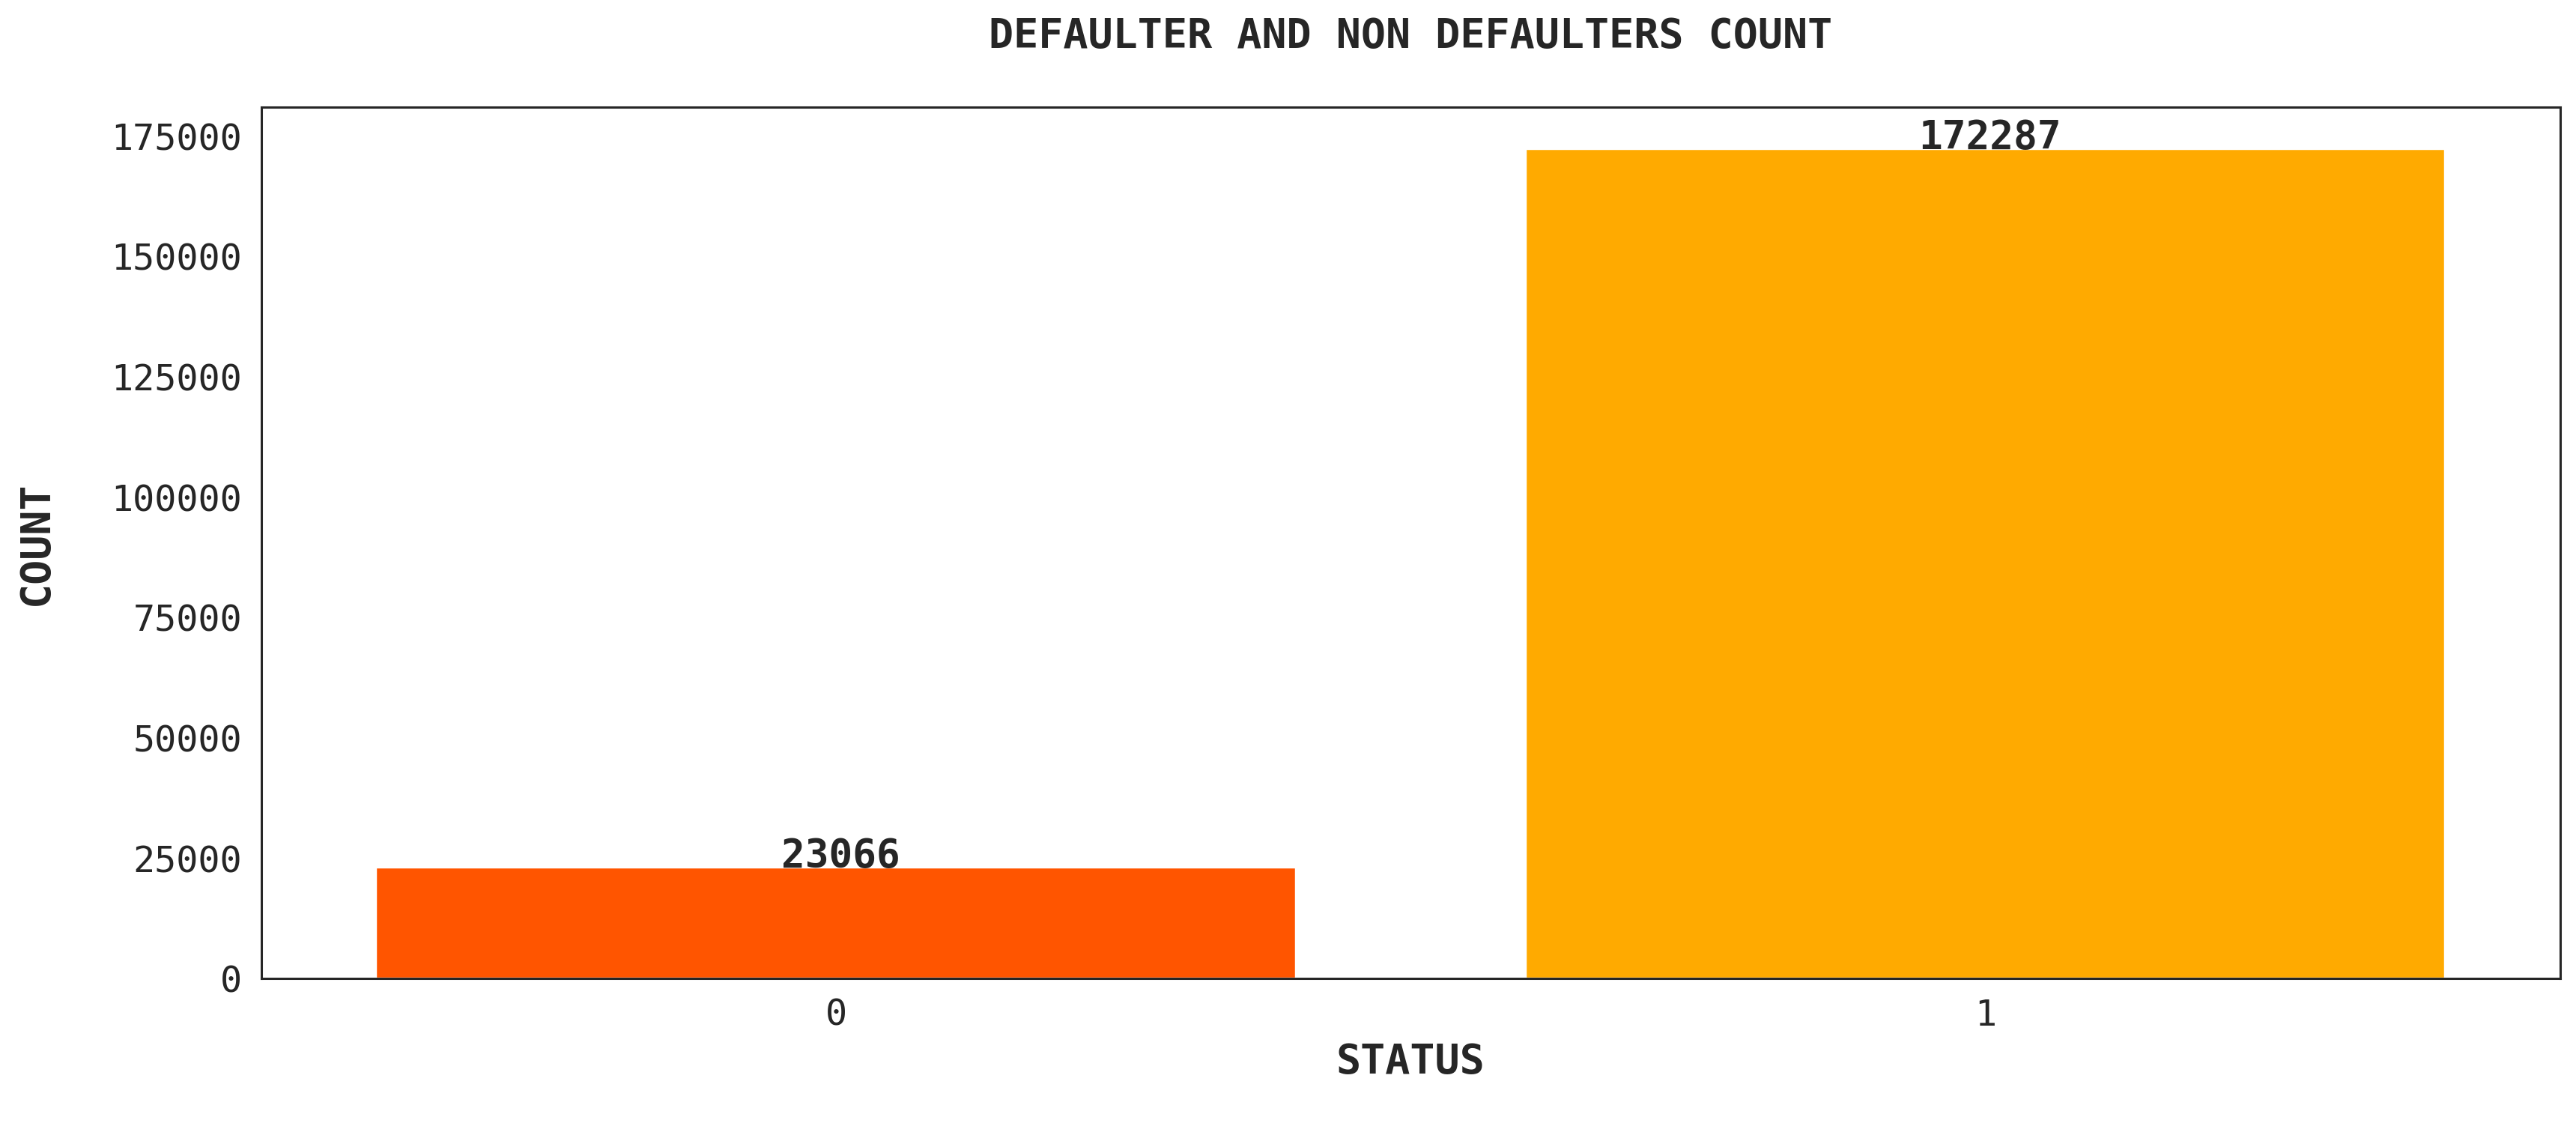

In [19]:
plt.figure(figsize=(18,7),dpi=220)
sns.set(context='paper',style='white',font='monospace',font_scale=1.8)
C1=sns.countplot(x='label',data=mfi,orient='v',palette='autumn',saturation=10)
for i in C1.patches:
    C1.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),
                ha='center',va='center',textcoords='offset points',weight='bold')
plt.xlabel('STATUS\n',fontsize=18,weight='bold')
plt.ylabel('COUNT\n',fontsize=18,weight='bold')
plt.title('DEFAULTER AND NON DEFAULTERS COUNT\n',fontsize=18,weight='bold')
plt.show()

 `From the above figure it is clear that the number of Defaulter (0) is lower than Non-Defaulter (1) count`

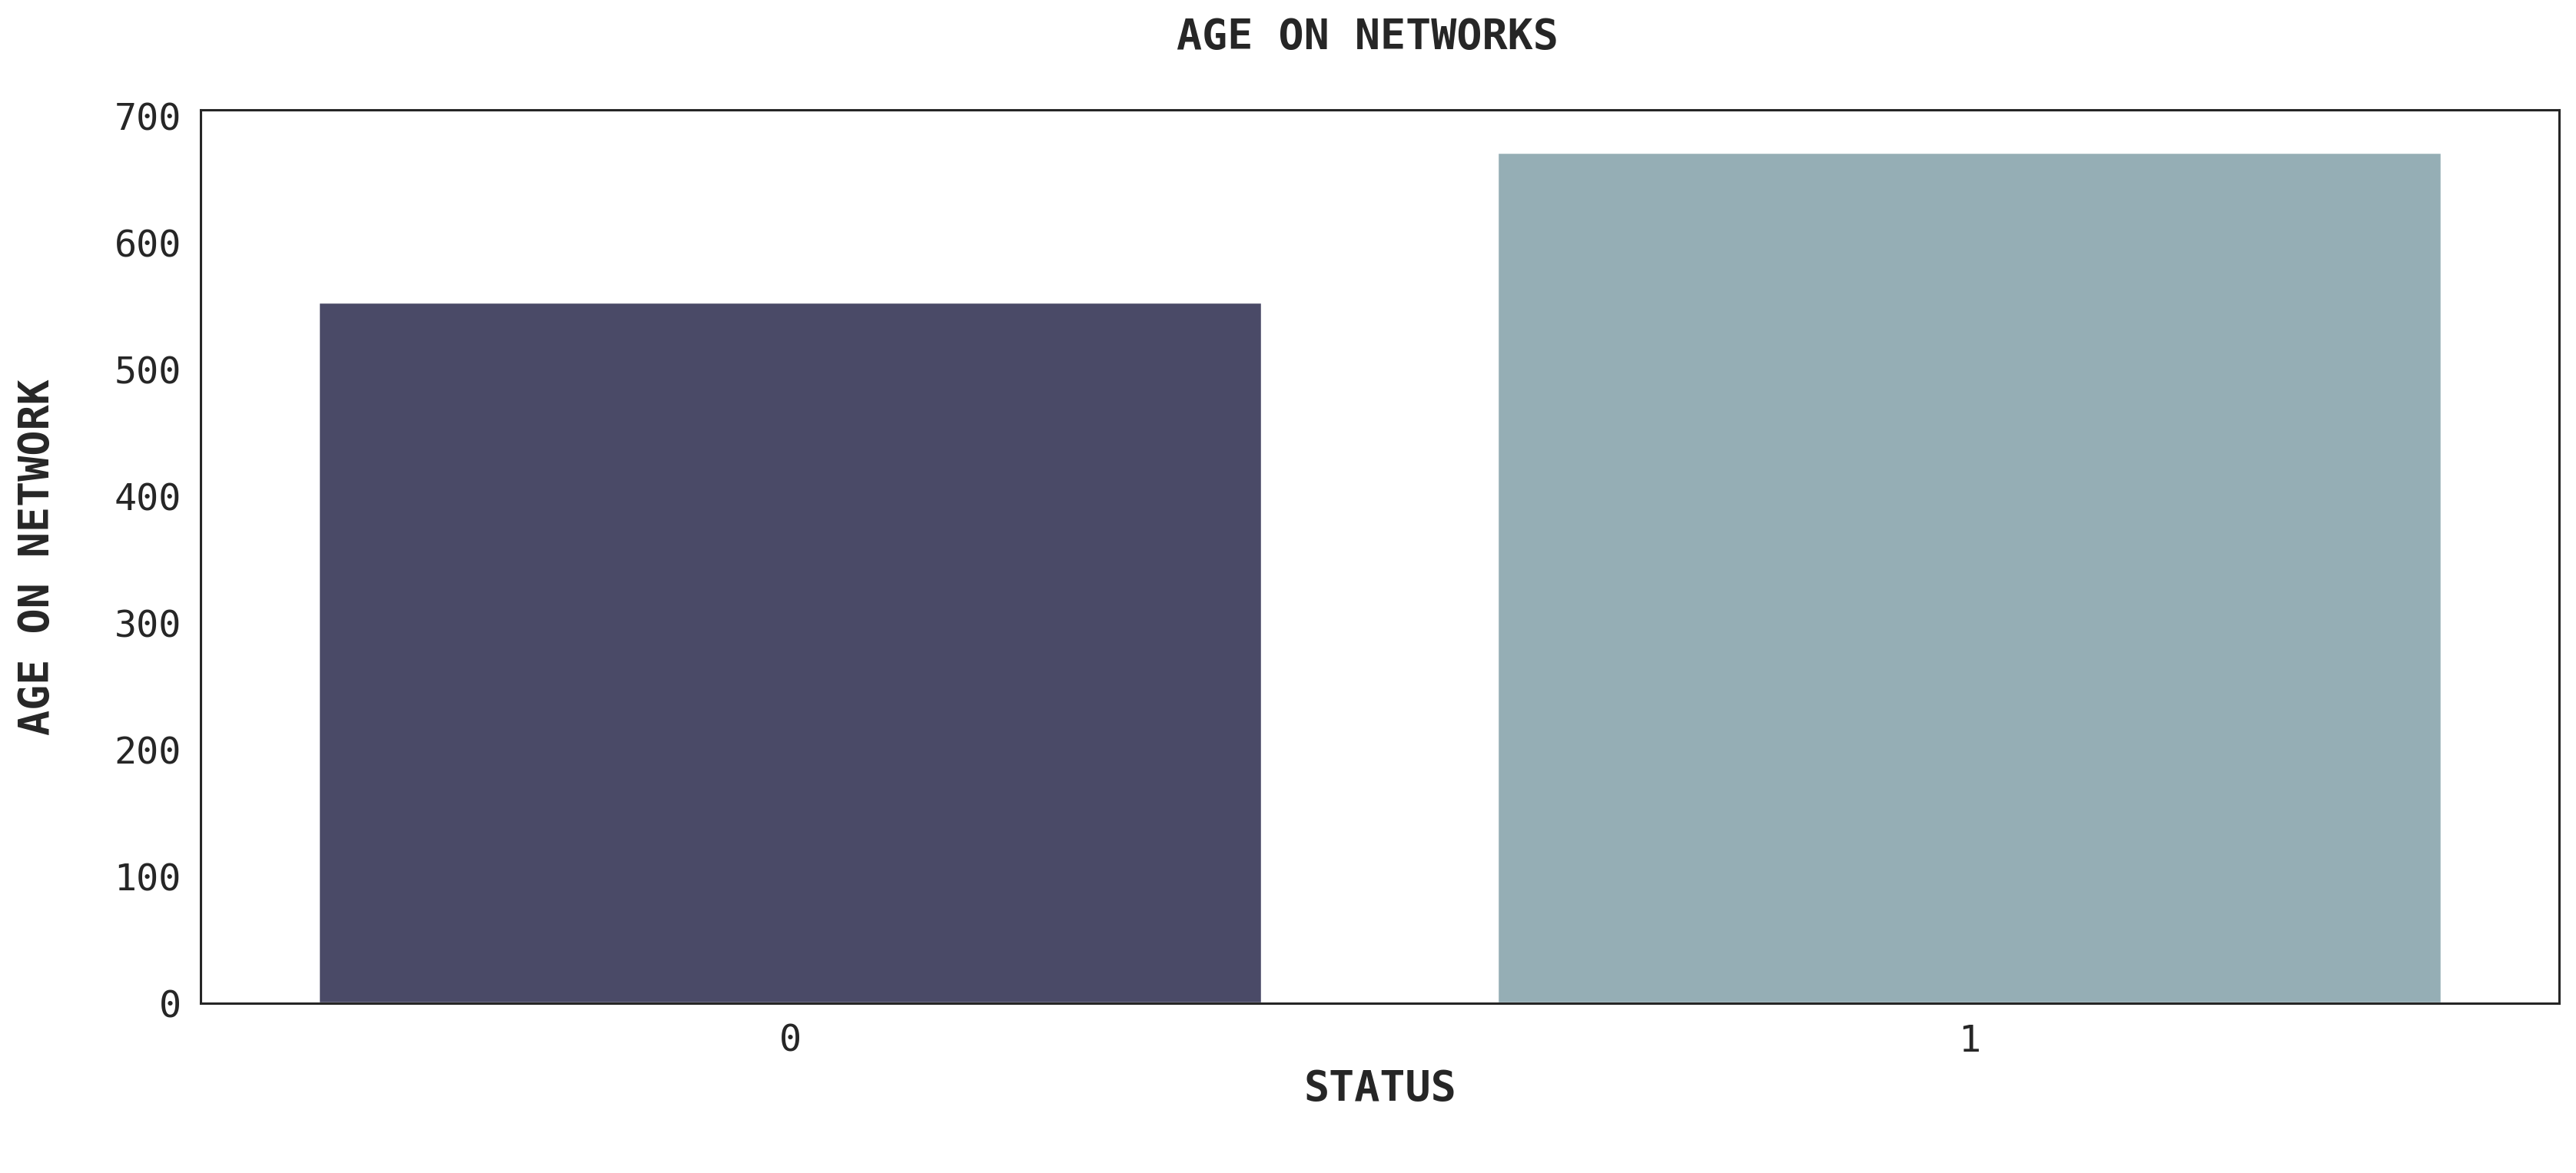

In [20]:
plt.figure(figsize=(18,7),dpi=220)
sns.set(context='paper',style='white',font='monospace',font_scale=1.8)
sns.barplot(x='label',y='aon',data=mfi,ci=None,palette="bone",saturation=35)
plt.xlabel('STATUS\n',fontsize=18,weight='bold')
plt.ylabel('AGE ON NETWORK\n',fontsize=18,weight='bold')
plt.title('AGE ON NETWORKS \n',fontsize=18,weight='bold')
plt.show()

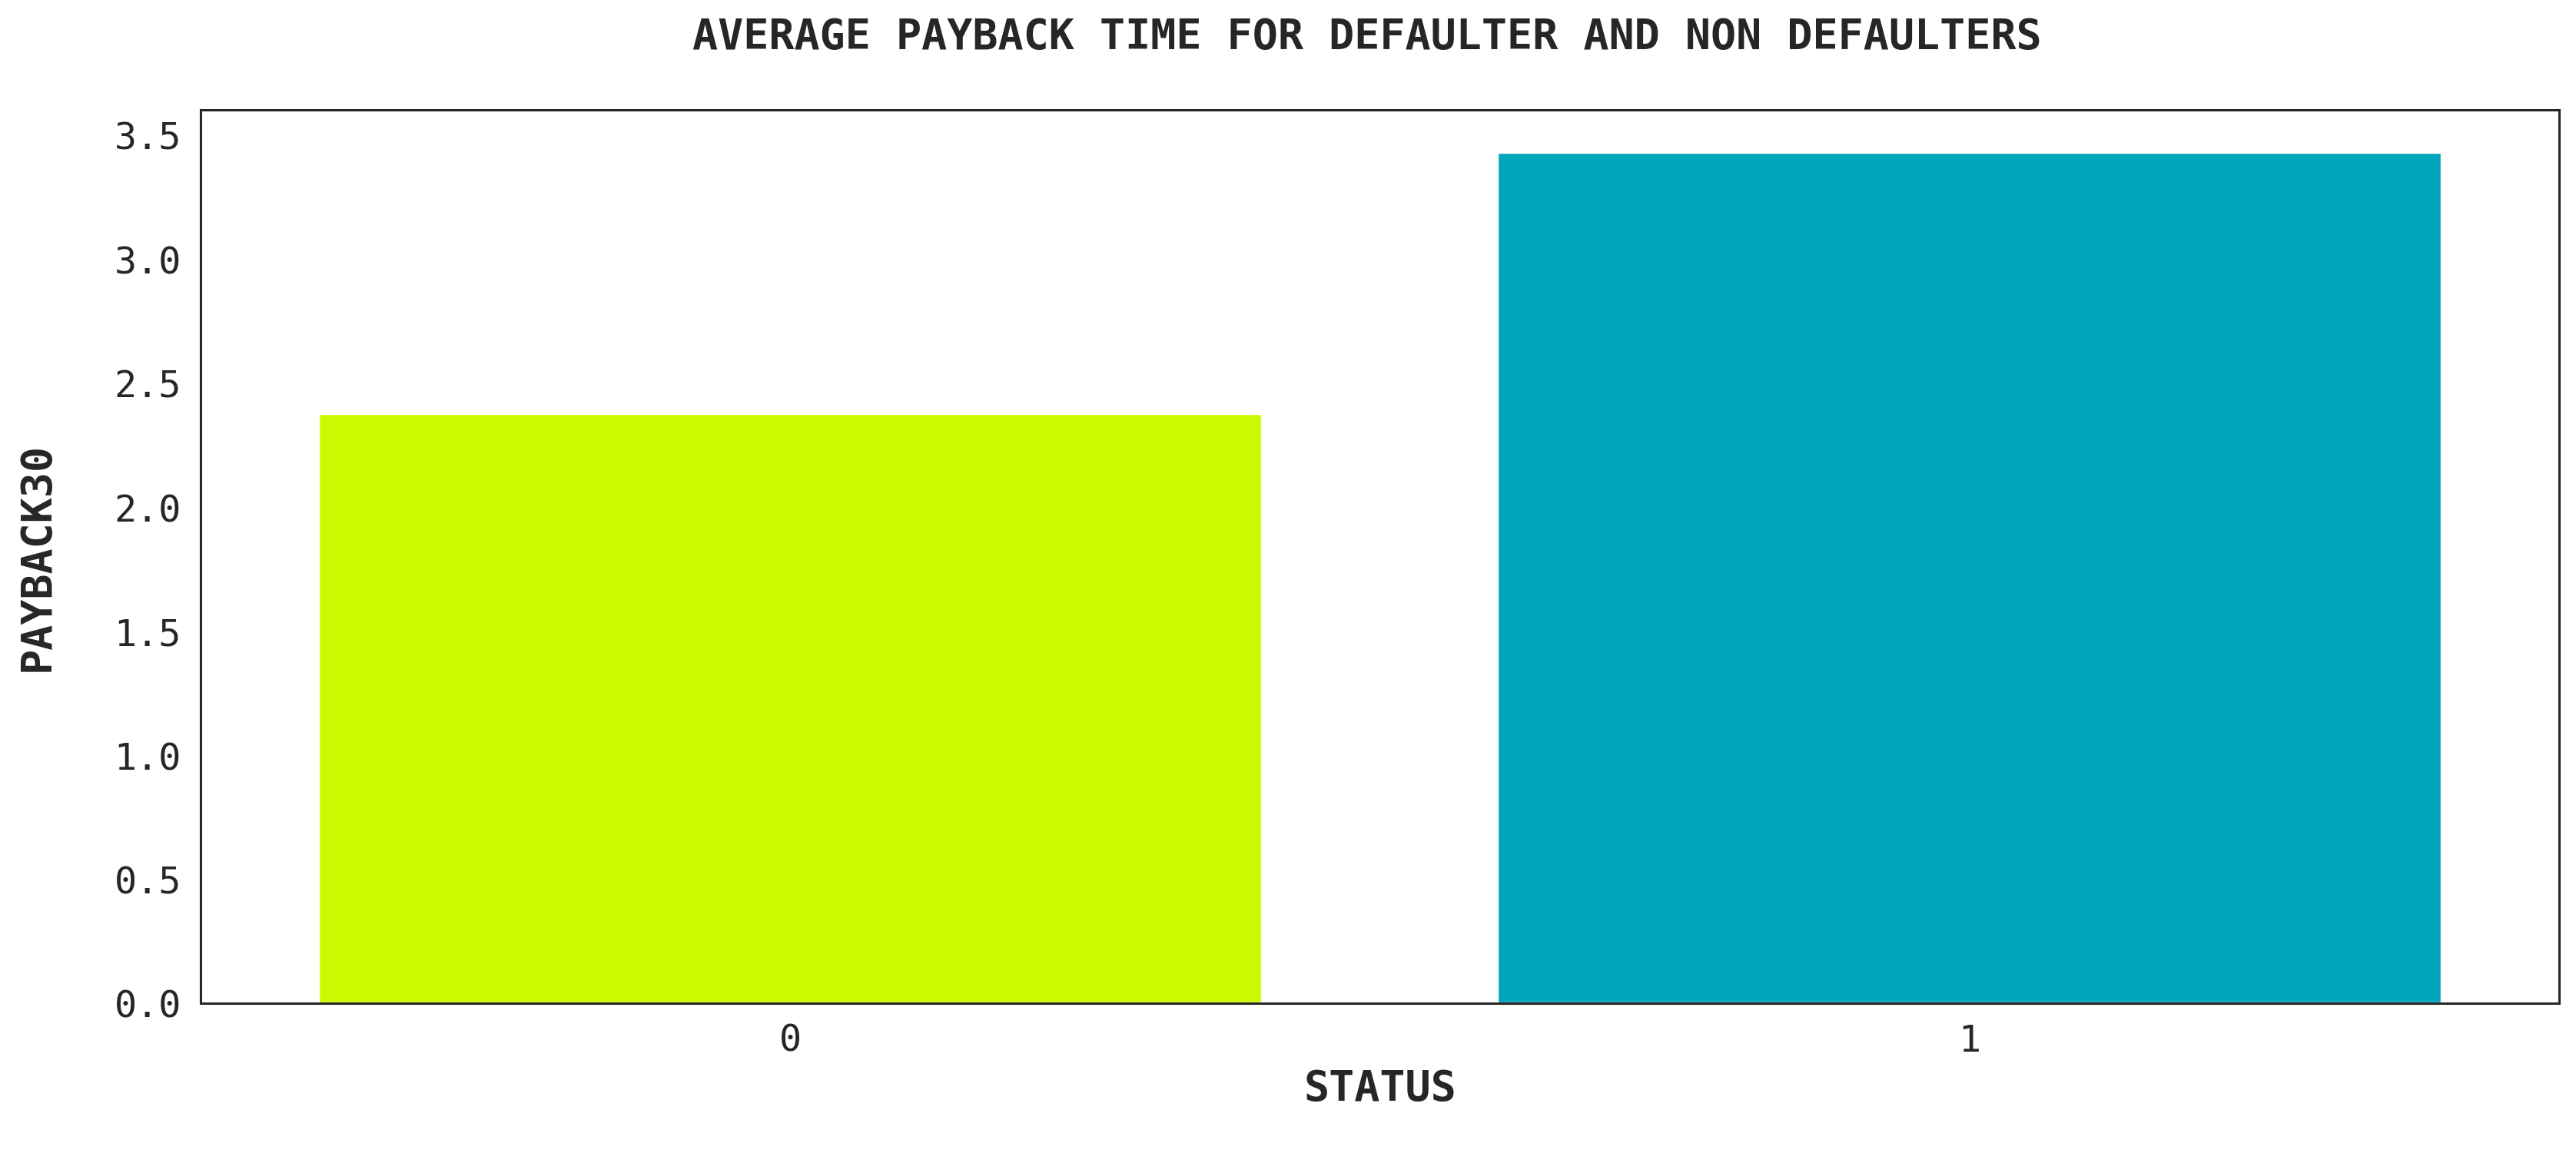

In [21]:
plt.figure(figsize=(18,7),dpi=220)
sns.set(context='paper',style='white',font='monospace',font_scale=1.8)
sns.barplot(x='label',y='payback30',data=mfi,ci=None,palette="nipy_spectral_r",saturation=35)
plt.xlabel('STATUS\n',fontsize=18,weight='bold')
plt.ylabel('PAYBACK30\n',fontsize=18,weight='bold')
plt.title('AVERAGE PAYBACK TIME FOR DEFAULTER AND NON DEFAULTERS \n',fontsize=18,weight='bold')
plt.show()

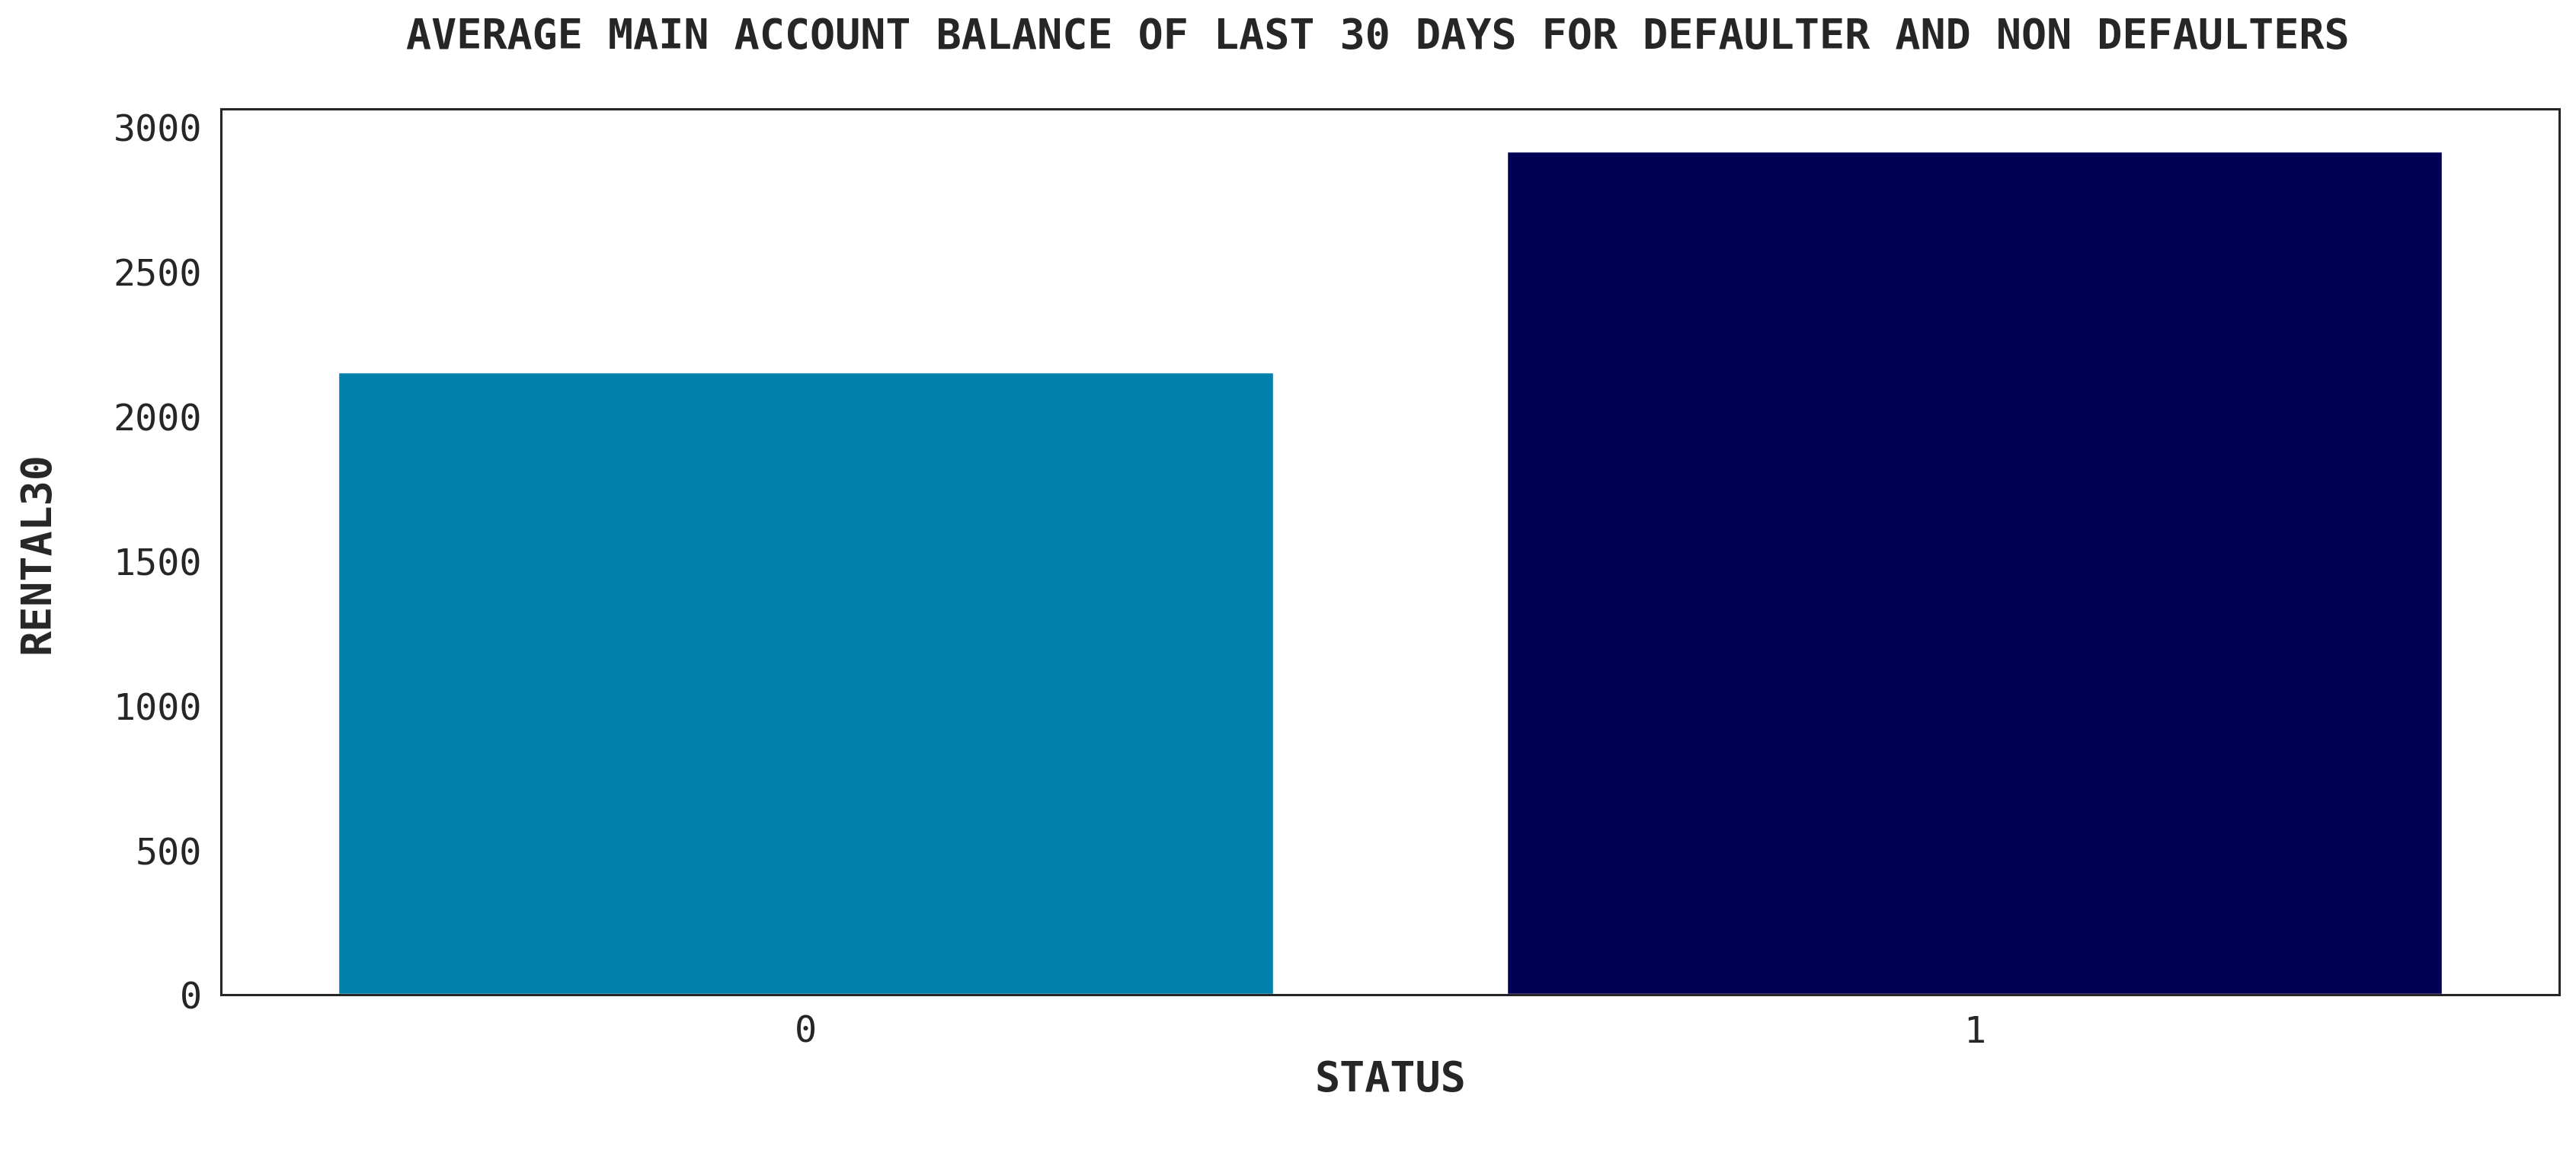

In [22]:
plt.figure(figsize=(18,7),dpi=220)
sns.set(context='paper',style='white',font='monospace',font_scale=1.8)
sns.barplot(x='label',y='rental30',data=mfi,ci=None,palette="ocean_r",saturation=35)
plt.xlabel('STATUS\n',fontsize=18,weight='bold')
plt.ylabel('RENTAL30\n',fontsize=18,weight='bold')
plt.title('AVERAGE MAIN ACCOUNT BALANCE OF LAST 30 DAYS FOR DEFAULTER AND NON DEFAULTERS \n',fontsize=18,weight='bold')
plt.show()

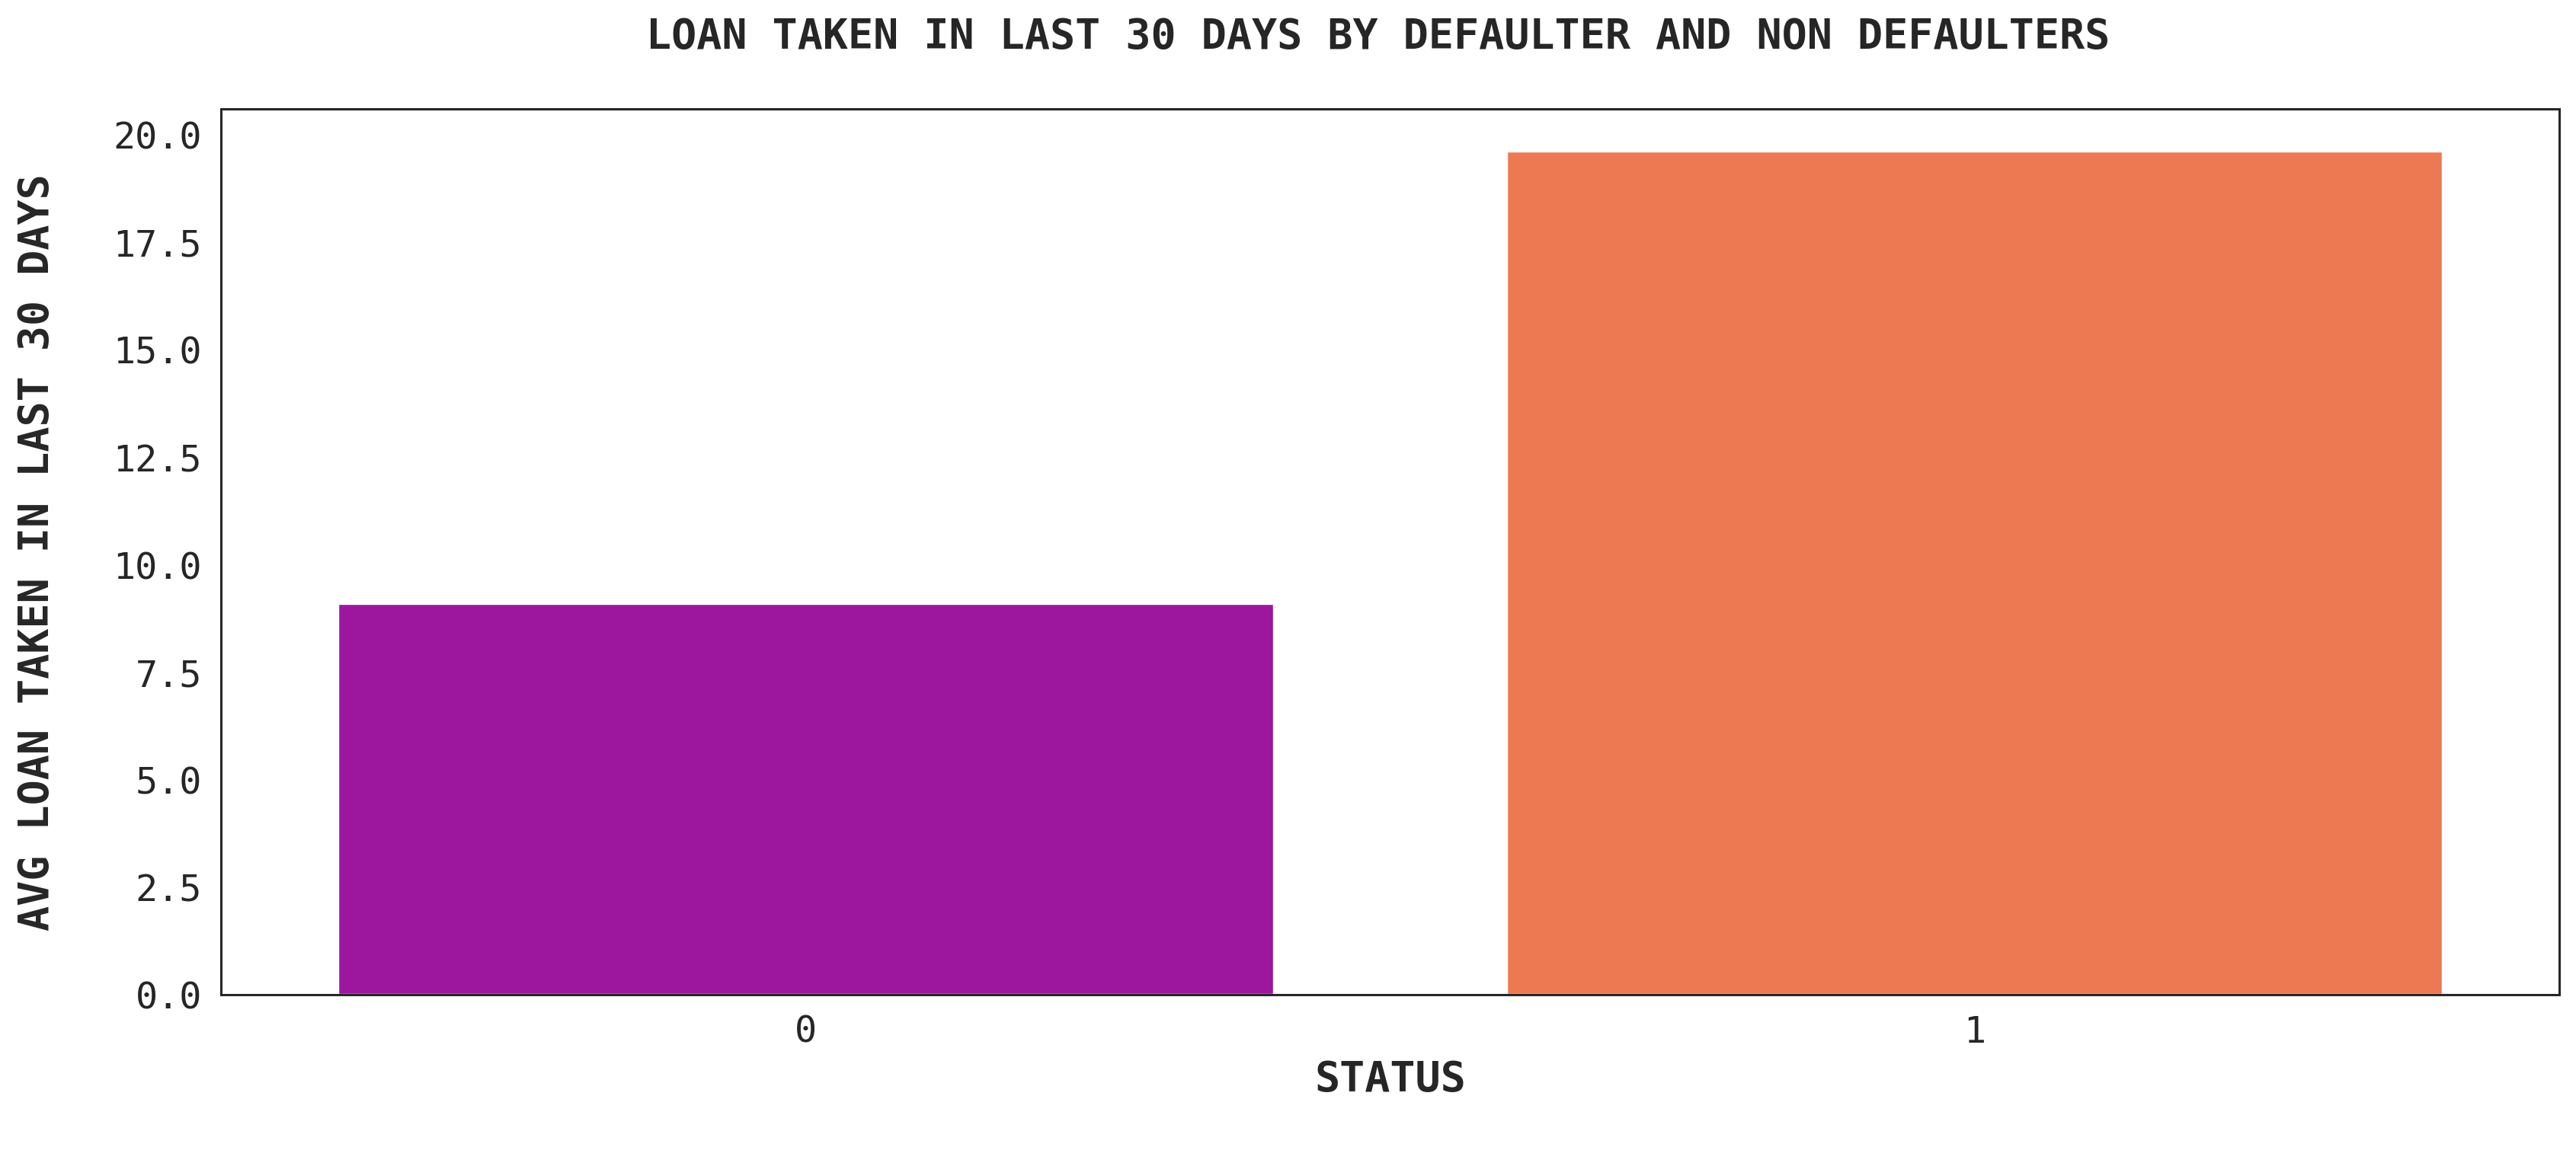

In [23]:
plt.figure(figsize=(18,7),dpi=220)
sns.set(context='paper',style='white',font='monospace',font_scale=1.8)
sns.barplot(x='label',y='amnt_loans30',data=mfi,ci=None,palette="plasma",saturation=35)
plt.xlabel('STATUS\n',fontsize=18,weight='bold')
plt.ylabel('AVG LOAN TAKEN IN LAST 30 DAYS\n',fontsize=18,weight='bold')
plt.title('LOAN TAKEN IN LAST 30 DAYS BY DEFAULTER AND NON DEFAULTERS \n',fontsize=18,weight='bold')
plt.show()

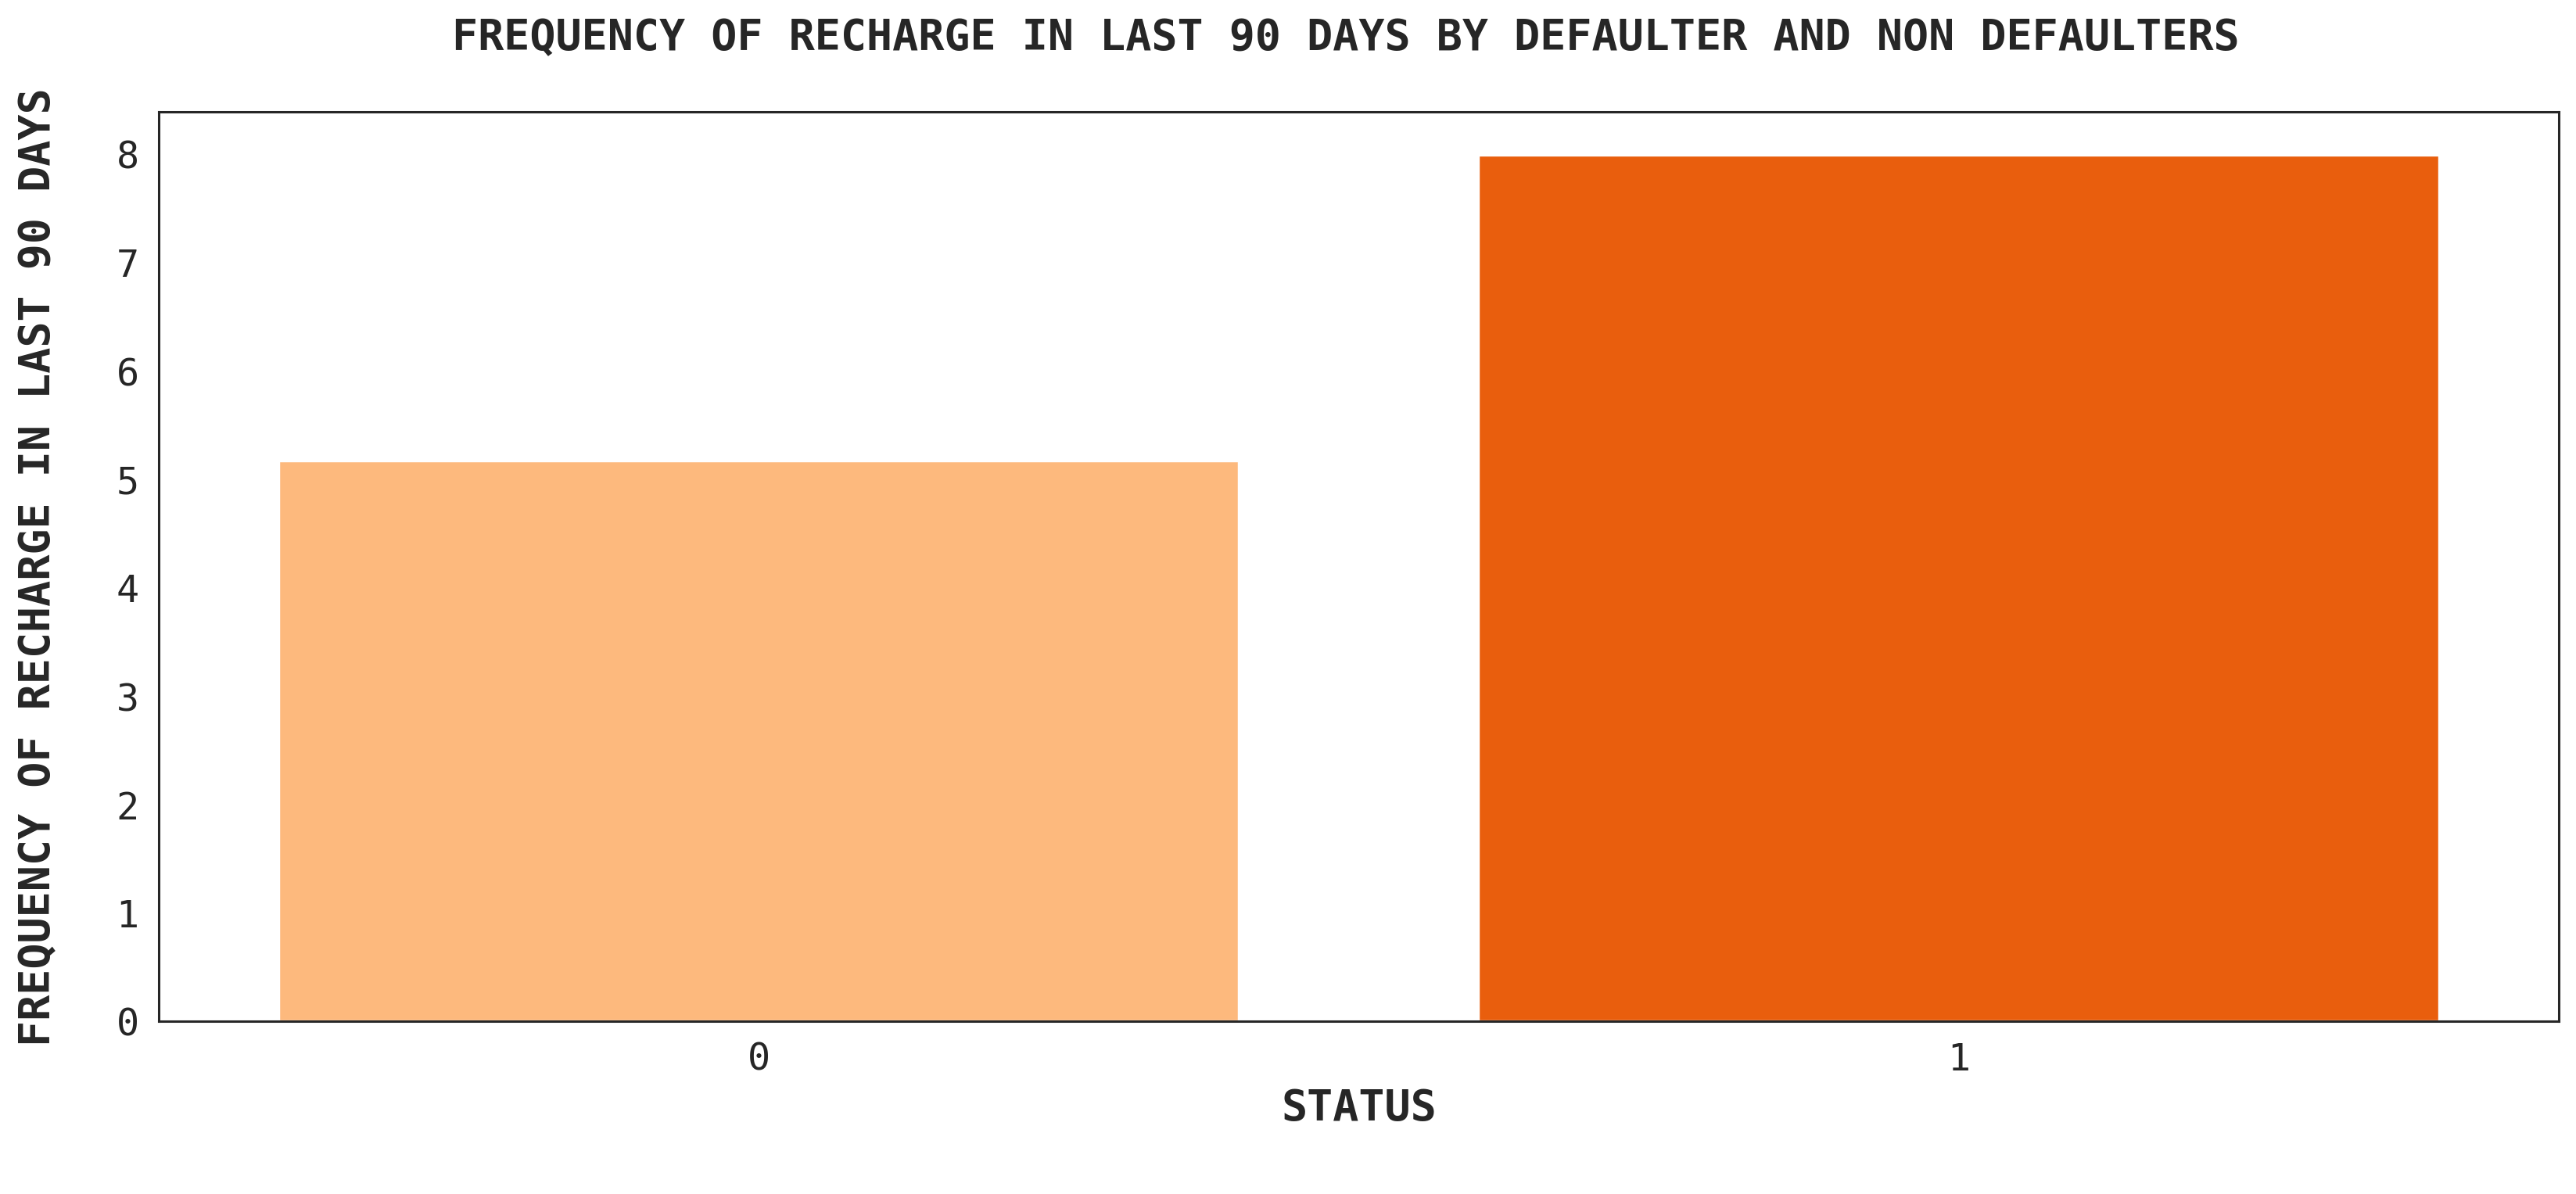

In [24]:
plt.figure(figsize=(18,7),dpi=220)
sns.set(context='paper',style='white',font='monospace',font_scale=1.8)
sns.barplot(x='label',y='fr_ma_rech90',data=mfi,ci=None,palette="Oranges",saturation=35)
plt.xlabel('STATUS\n',fontsize=18,weight='bold')
plt.ylabel('FREQUENCY OF RECHARGE IN LAST 90 DAYS\n',fontsize=18,weight='bold')
plt.title('FREQUENCY OF RECHARGE IN LAST 90 DAYS BY DEFAULTER AND NON DEFAULTERS \n',fontsize=18,weight='bold')
plt.show()

In [25]:
mficn=mfi.columns.values

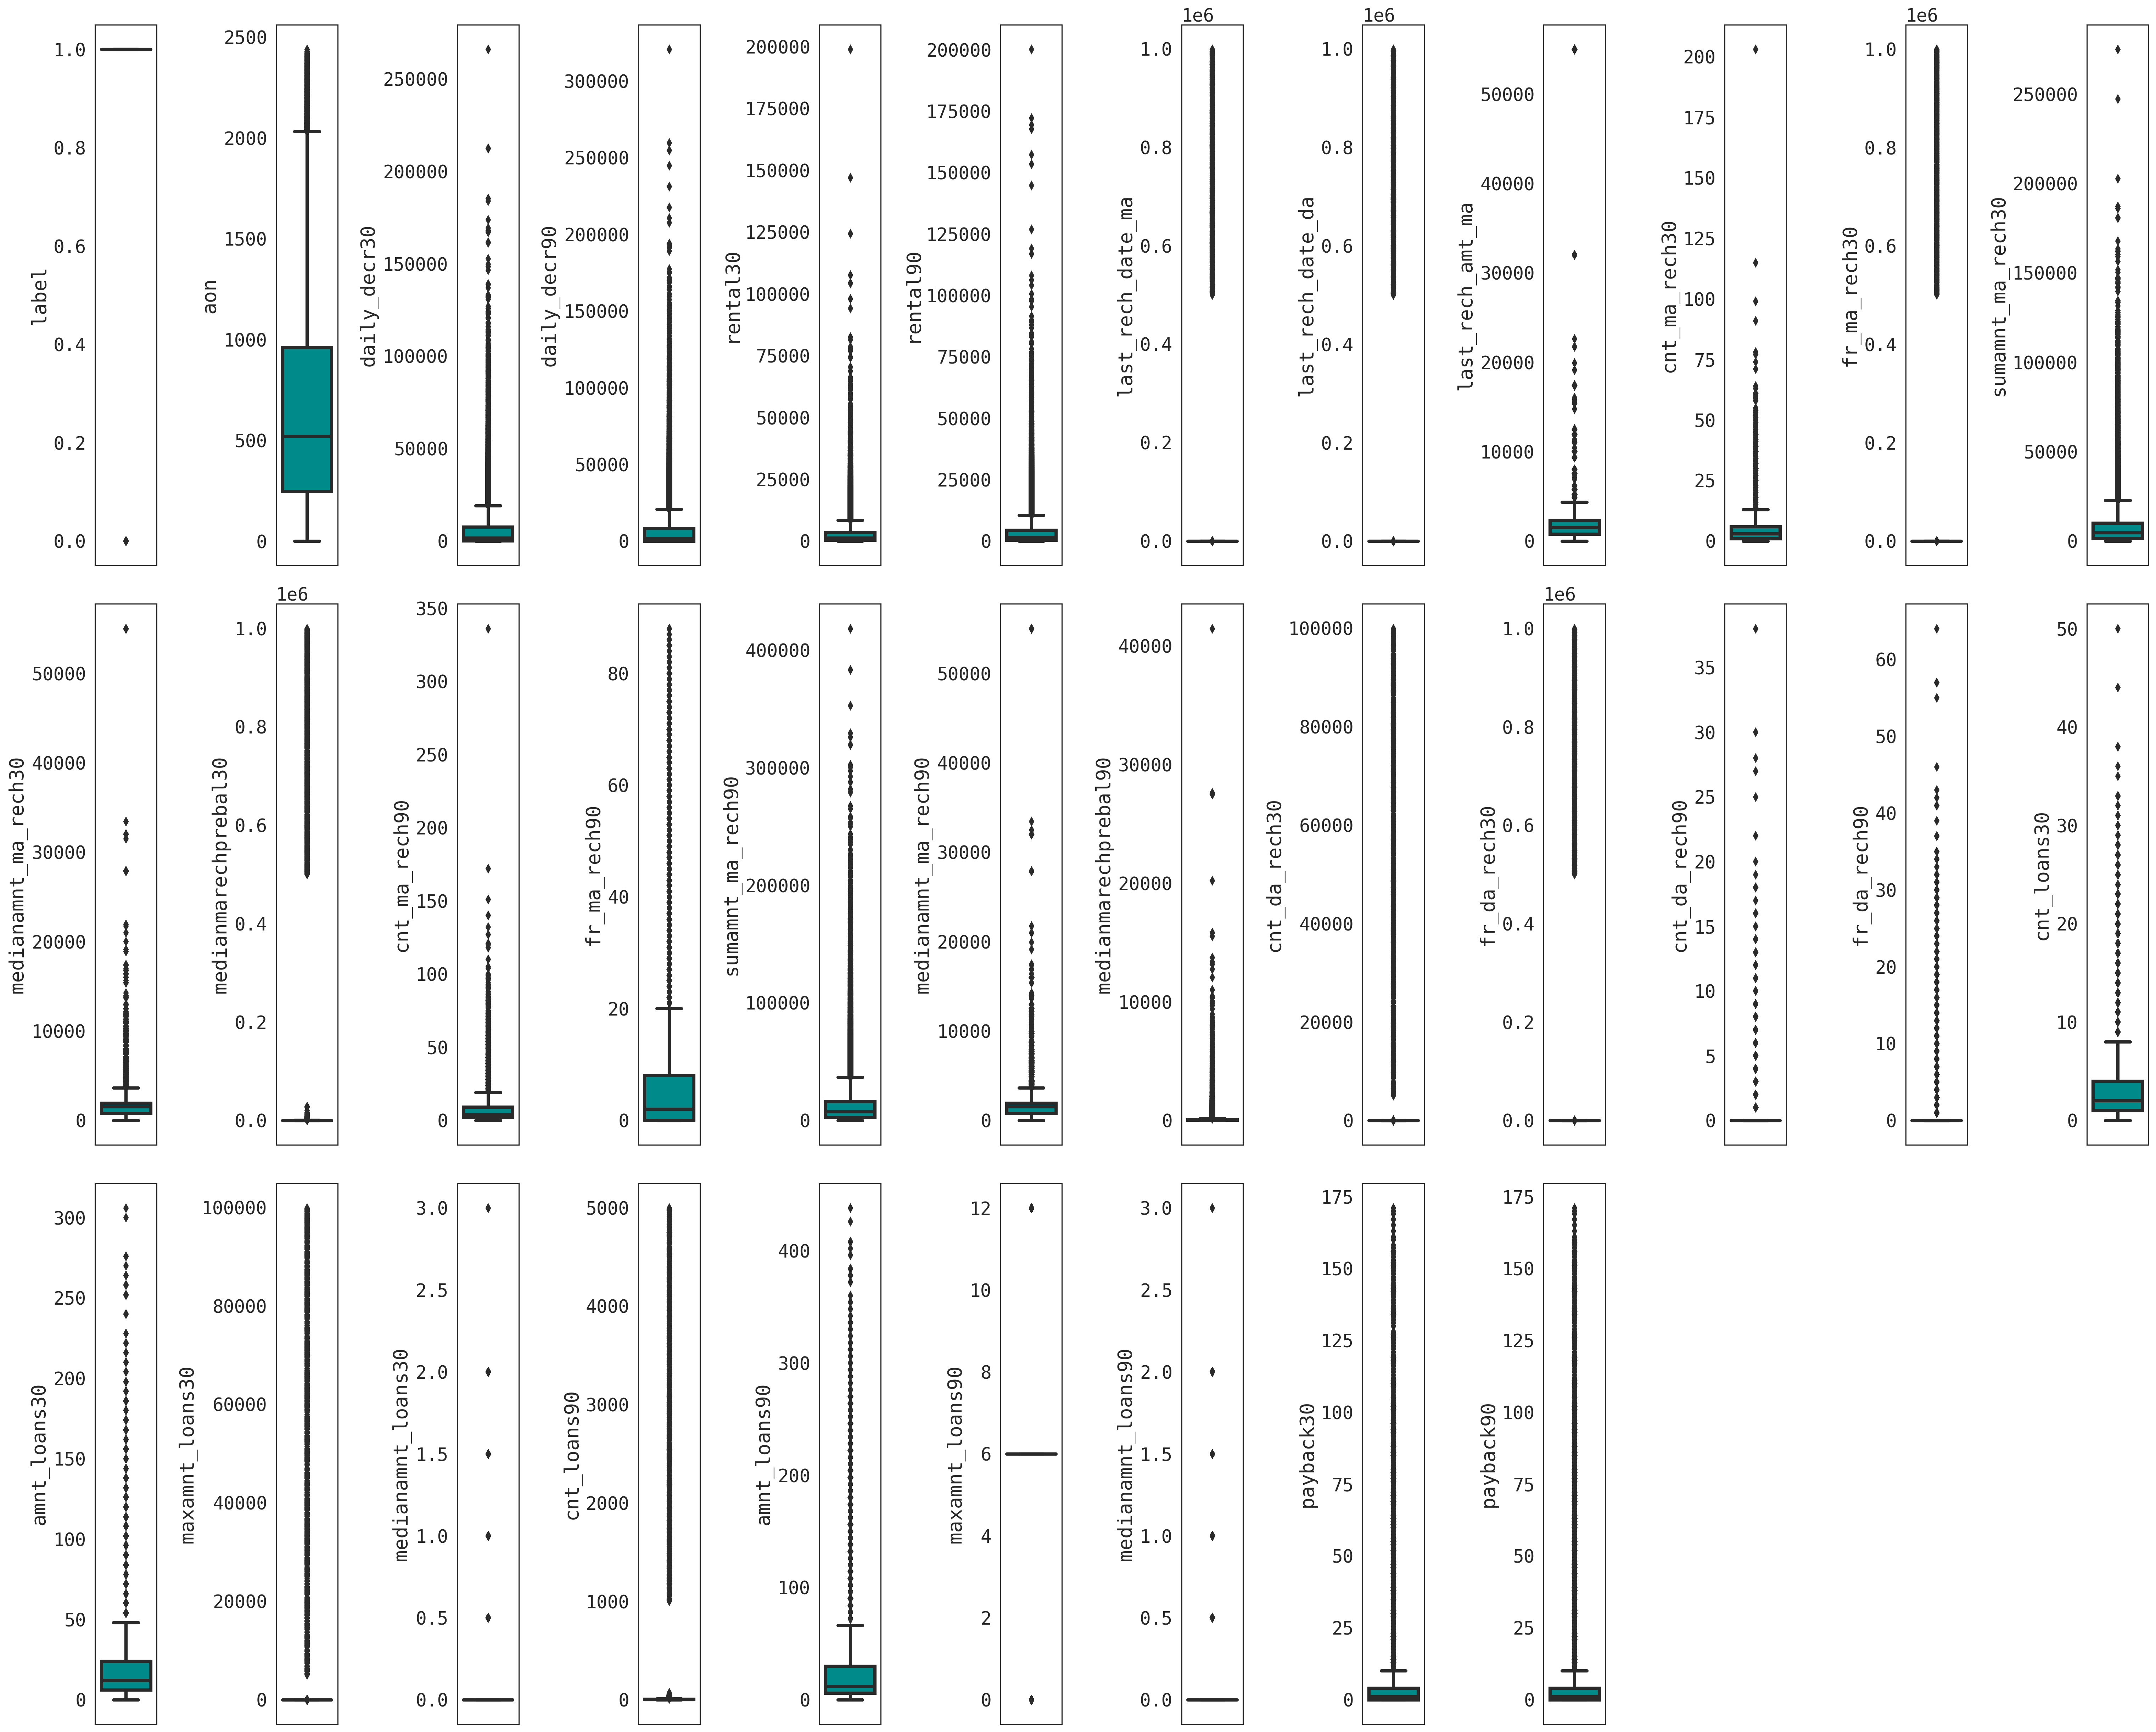

In [26]:
plt.figure(figsize=(28,30),dpi=220)
sns.set(context='paper',style='white',font='monospace',font_scale=1.9)
for i in range(len(mficn)):
    plt.subplot(4,12,i+1)
    sns.boxplot(mfi[mficn[i]],color='darkcyan',orient='v',saturation=18,linewidth=3) 
    plt.tight_layout()   
plt.show()

In [27]:
#as we can't remove moe than 7 to 8 % of data as outlier so instead of using zscore method i have used manull removemal of data

mfi.drop(mfi.index[mfi['aon']>2500], inplace = True)

mfi.drop(mfi.index[mfi['daily_decr30']>220000], inplace = True)

mfi.drop(mfi.index[mfi['daily_decr90']>280000], inplace = True)

mfi.drop(mfi.index[mfi['rental30']>220000], inplace = True)

mfi.drop(mfi.index[mfi['rental90']>220000], inplace = True)

mfi.drop(mfi.index[mfi['last_rech_date_ma']>2000], inplace = True)

mfi.drop(mfi.index[mfi['last_rech_date_da']>2000], inplace = True)

mfi.drop(mfi.index[mfi['last_rech_amt_ma']>250000], inplace = True)

mfi.drop(mfi.index[mfi['cnt_ma_rech30']>220], inplace = True)

mfi.drop(mfi.index[mfi['fr_ma_rech30']>180], inplace = True)

mfi.drop(mfi.index[mfi['sumamnt_ma_rech30']>130000], inplace = True)

mfi.drop(mfi.index[mfi['medianamnt_ma_rech30']>180000], inplace = True)

mfi.drop(mfi.index[mfi['medianmarechprebal30']>180000], inplace = True)

mfi.drop(mfi.index[mfi['cnt_ma_rech90']>300], inplace = True)

mfi.drop(mfi.index[mfi['fr_ma_rech90']>300], inplace = True)

mfi.drop(mfi.index[mfi['sumamnt_ma_rech90']>280000], inplace = True)

mfi.drop(mfi.index[mfi['medianamnt_ma_rech90']>220000], inplace = True)

mfi.drop(mfi.index[mfi['medianmarechprebal90']>100000], inplace = True)

mfi.drop(mfi.index[mfi['cnt_da_rech30']>100], inplace = True)

mfi.drop(mfi.index[mfi['fr_da_rech30']>100], inplace = True)

mfi.drop(mfi.index[mfi['cnt_da_rech90']>300], inplace = True)

mfi.drop(mfi.index[mfi['fr_da_rech90']>250], inplace = True)

mfi.drop(mfi.index[mfi['cnt_loans30']>170], inplace = True)

mfi.drop(mfi.index[mfi['amnt_loans30']>1200], inplace = True)

mfi.drop(mfi.index[mfi['maxamnt_loans30']>220000], inplace = True)

mfi.drop(mfi.index[mfi['medianamnt_loans30']>150000], inplace = True)

mfi.drop(mfi.index[mfi['cnt_loans90']>20000], inplace = True)

mfi.drop(mfi.index[mfi['amnt_loans90']>350000], inplace = True)

mfi.drop(mfi.index[mfi['maxamnt_loans90']>280000], inplace = True)

mfi.drop(mfi.index[mfi['medianamnt_loans90']>220000], inplace = True)

mfi.drop(mfi.index[mfi['payback30']>130], inplace = True)

mfi.drop(mfi.index[mfi['payback90']>275], inplace = True)

In [28]:
mfi.describe()

label            aon   daily_decr30   daily_decr90  \
count  189339.000000  189339.000000  189339.000000  189339.000000   
mean        0.881894     656.550827    5608.441887    6345.001475   
std         0.322734     495.818853    9210.190454   10922.141231   
min         0.000000       1.000000       0.000000       0.000000   
25%         1.000000     247.000000      47.056667      47.291167   
50%         1.000000     520.000000    1743.008000    1787.520000   
75%         1.000000     960.000000    7654.900000    8289.850000   
max         1.000000    2440.000000  173834.000000  210520.820000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  189339.000000  189339.000000      189339.000000      189339.000000   
mean     2824.212137    3658.792931           6.137917           0.974453   
std      4363.144607    5850.321664           9.273455           7.204642   
min         0.000000       0.000000           0.000000           0.000000   
25%       331.835000     380.575000           1.000000           0.000000   
50%      1187.480000    1474.880000           3.000000           0.000000   
75%      3552.380000    4421.690000           7.000000           0.000000   
max    198926.110000  200148.110000         113.000000         115.000000   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     189339.000000  189339.000000  189339.000000      189339.000000   
mean        2015.101638       4.075885       3.895484        7679.708016   
std         2261.799084       4.258987       5.276736        9475.545415   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1546.000000   
50%         1539.000000       3.000000       2.000000        4638.000000   
75%         2309.000000       6.000000       6.000000       10018.000000   
max        55000.000000      91.000000      30.000000      128927.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         189339.000000         189339.000000  189339.000000   
mean            1767.834831             95.673742       6.507259   
std             1964.753274            327.614743       7.228845   
min                0.000000              0.000000       0.000000   
25%              770.000000             12.100000       2.000000   
50%             1539.000000             35.000000       4.000000   
75%             1924.000000             83.000000       9.000000   
max            55000.000000          27611.700000     151.000000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  189339.000000      189339.000000         189339.000000   
mean        7.655422       12501.415577           1814.050925   
std        12.424699       16351.111131           1971.969405   
min         0.000000           0.000000              0.000000   
25%         0.000000        2482.000000            773.000000   
50%         2.000000        7526.000000           1539.000000   
75%         8.000000       16181.000000           1924.000000   
max        88.000000      279491.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         189339.000000  189339.000000  189339.000000  189339.000000   
mean              92.588711       0.023682       0.019008       0.042960   
std              351.281302       0.275068       0.455469       0.407693   
min                0.000000       0.000000       0.000000       0.000000   
25%               16.000000       0.000000       0.000000       0.000000   
50%               37.330000       0.000000       0.000000       0.000000   
75%               80.000000       0.000000       0.000000       0.000000   
max            41456.500000      34.000000      25.000000      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  189339.000000  189339.000000  189339.000000    18933

In [29]:
data_loss=round(((micro.shape[0]-mfi.shape[0])/micro.shape[0])*100,3)

In [30]:
print(' Earlier the shape of dataset with outliers was:',micro.shape,'\n The shape of the dataset after outlier removal is:',mfi.shape,  '\n Percentage of data_loss:', data_loss) 

 Earlier the shape of dataset with outliers was: (209593, 33) 
 The shape of the dataset after outlier removal is: (189339, 33) 
 Percentage of data_loss: 9.663


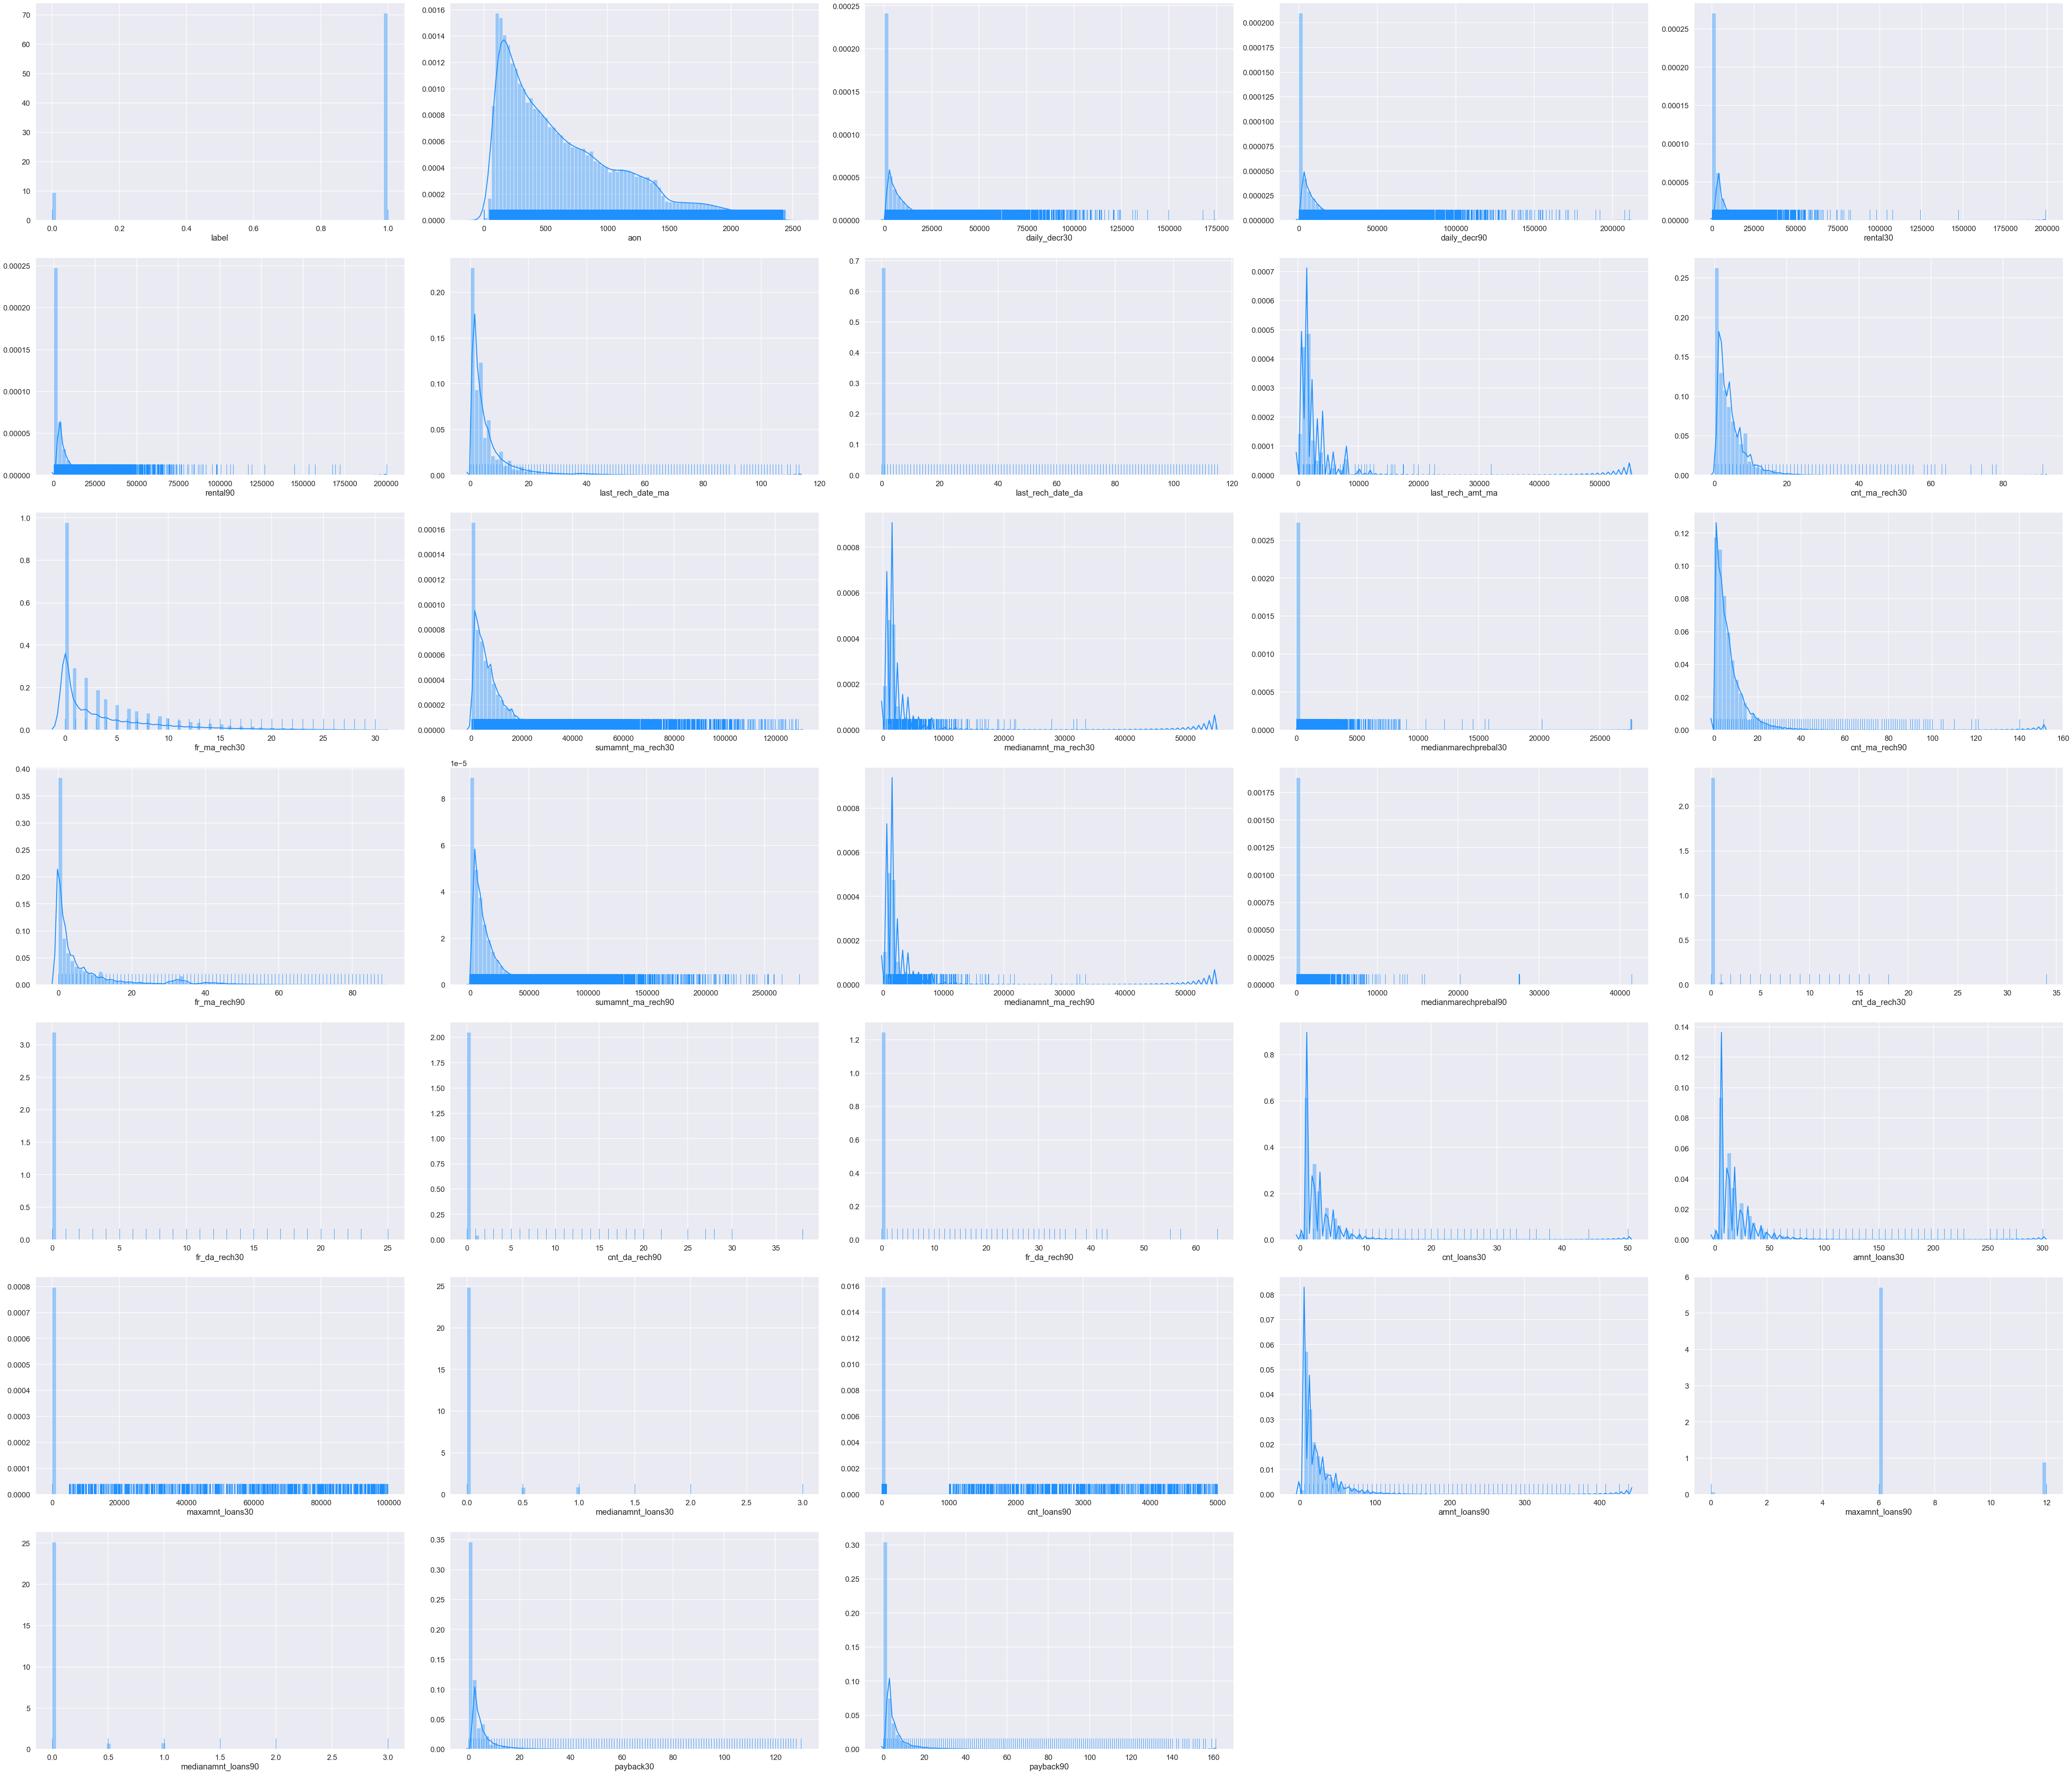

In [31]:
plt.figure(figsize=(70,60))
sns.set(style='darkgrid')
sns.set_context('talk',font_scale=1.1)
for i in range(len(mficn)):
    plt.subplot(7,5,i+1)
    sns.distplot(mfi[mficn[i]], color='dodgerblue', bins=80,kde=True,rug=True)
    plt.tight_layout()

In [32]:
mfi.skew()

label                   -2.366645
aon                      0.962857
daily_decr30             3.409180
daily_decr90             3.721356
rental30                 4.527045
rental90                 4.412998
last_rech_date_ma        3.601934
last_rech_date_da        9.477004
last_rech_amt_ma         3.721702
cnt_ma_rech30            2.663704
fr_ma_rech30             1.830147
sumamnt_ma_rech30        3.332506
medianamnt_ma_rech30     3.502896
medianmarechprebal30    40.097198
cnt_ma_rech90            2.882586
fr_ma_rech90             2.306003
sumamnt_ma_rech90        3.633713
medianamnt_ma_rech90     3.731034
medianmarechprebal90    45.458656
cnt_da_rech30           30.760714
fr_da_rech30            30.374055
cnt_da_rech90           27.094602
fr_da_rech90            27.843207
cnt_loans30              2.653350
amnt_loans30             2.846591
maxamnt_loans30         17.574656
medianamnt_loans30       4.585878
cnt_loans90             16.626053
amnt_loans90             3.036411
maxamnt_loans9

In [33]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and that must be removed.
for i in mfi.columns:
    if mfi.skew().loc[i]>0.55:
        mfi[i]=np.log1p(mfi[i])
    if mfi.skew().loc[i]< -0.55:
        mfi[i]=np.square(mfi[i])

<Figure size 1440x360 with 0 Axes>

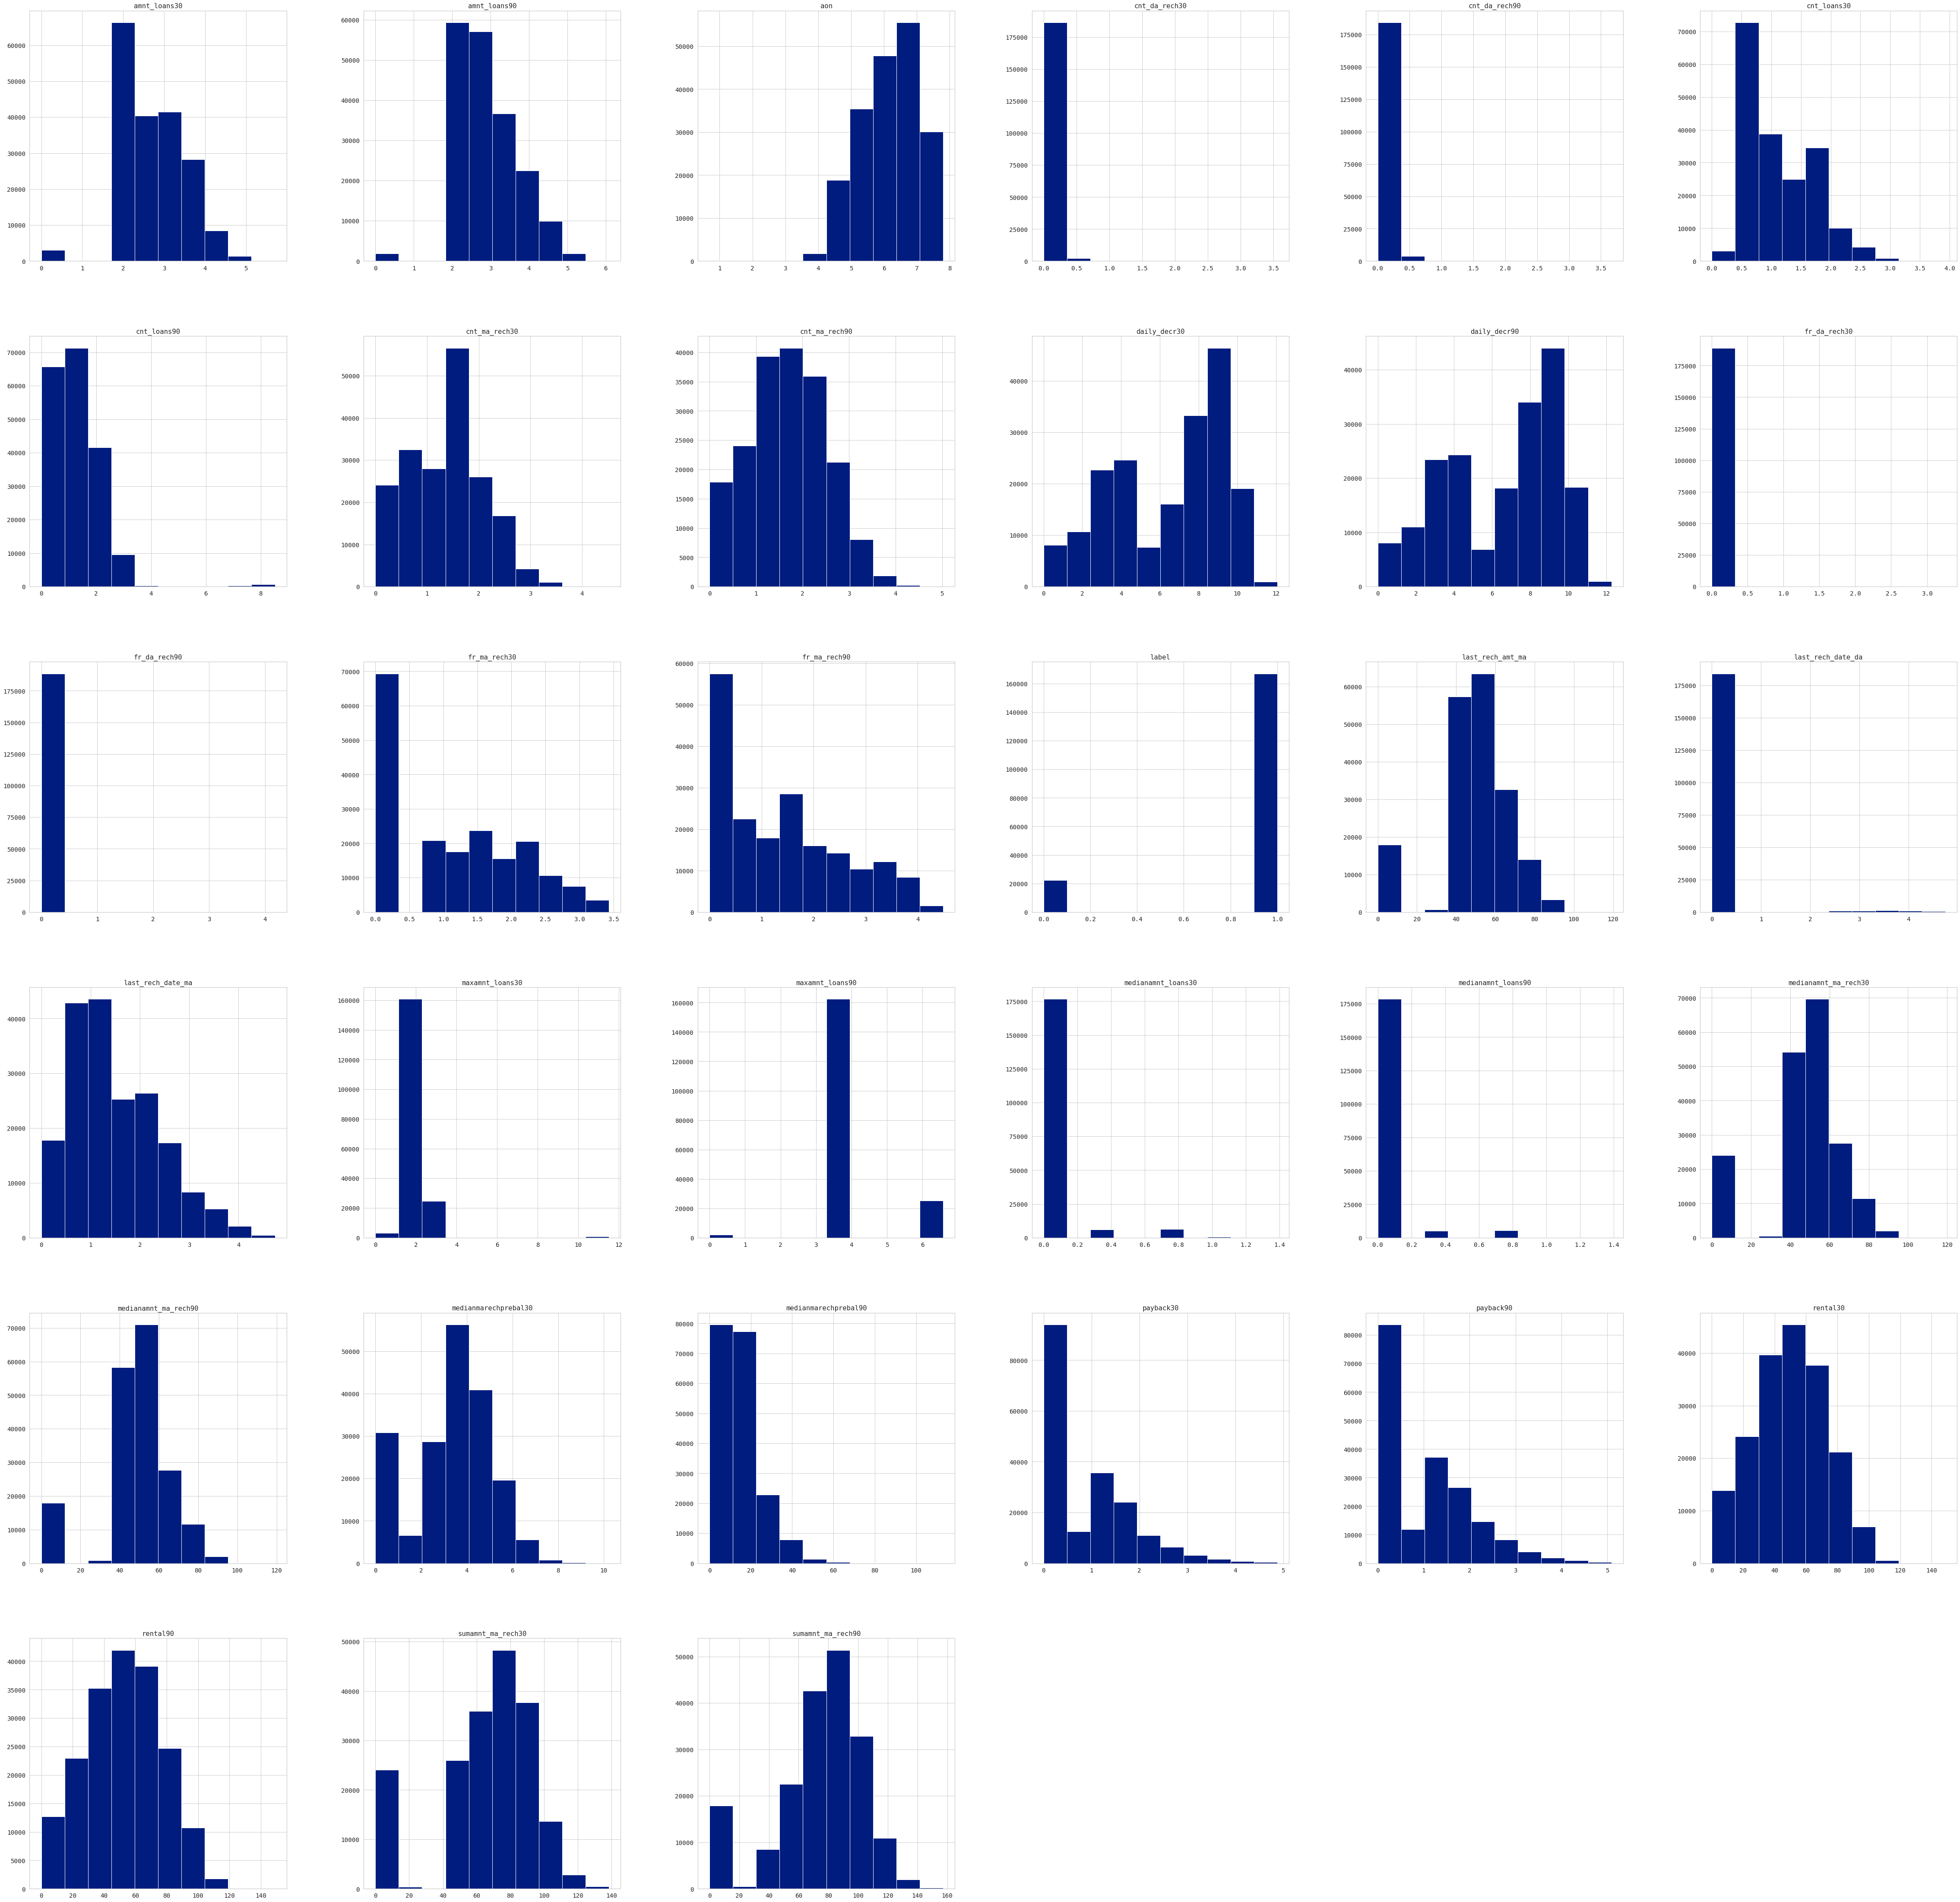

In [34]:
sns.set_context('talk',font_scale=1.9)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(12,3),dpi=120)
mfi.hist(figsize=(80,80),grid=True)
plt.show()

In [35]:
#creating a correlation table so the relation of attributes
mfi_corr=mfi.corr()
mfi_corr

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.098133      0.273327      0.274245   
aon                   0.098133  1.000000      0.117431      0.117666   
daily_decr30          0.273327  0.117431      1.000000      0.998622   
daily_decr90          0.274245  0.117666      0.998622      1.000000   
rental30              0.134175  0.086225      0.574047      0.575433   
rental90              0.147494  0.093970      0.630617      0.636318   
last_rech_date_ma     0.004484  0.050484      0.103479      0.107379   
last_rech_date_da     0.020688  0.007383      0.073903      0.074022   
last_rech_amt_ma      0.276937  0.089647      0.412594      0.411983   
cnt_ma_rech30         0.333731  0.035888      0.486987      0.482691   
fr_ma_rech30          0.217143  0.065921      0.280687      0.279265   
sumamnt_ma_rech30     0.358081  0.077686      0.539963      0.535220   
medianamnt_ma_rech30  0.290416  0.090260      0.418391      0.414480   
medianmarechprebal30  0.275225  0.056268      0.308551      0.305871   
cnt_ma_rech90         0.353434  0.057089      0.612177      0.615610   
fr_ma_rech90          0.178745  0.065709      0.181975      0.181589   
sumamnt_ma_rech90     0.370543  0.091732      0.632843      0.635231   
medianamnt_ma_rech90  0.270804  0.092839      0.408596      0.408417   
medianmarechprebal90  0.201185  0.051783      0.194717      0.194569   
cnt_da_rech30         0.003336  0.013886      0.035767      0.034249   
fr_da_rech30         -0.006491  0.008128      0.034270      0.033399   
cnt_da_rech90         0.008954  0.021399      0.064609      0.063552   
fr_da_rech90         -0.009176  0.010256      0.039013      0.038169   
cnt_loans30           0.227786  0.073968      0.340683      0.335501   
amnt_loans30          0.224258  0.075359      0.369766      0.364989   
maxamnt_loans30       0.013096  0.008989      0.078376      0.077215   
medianamnt_loans30    0.043459 -0.002362      0.010609      0.012095   
cnt_loans90           0.207522  0.098374      0.397139      0.398708   
amnt_loans90          0.258322  0.117659      0.509280      0.510798   
maxamnt_loans90       0.076357  0.039968      0.319894      0.322191   
medianamnt_loans90    0.034206 -0.010446     -0.024127     -0.024039   
payback30             0.179702  0.077015      0.267029      0.264382   
payback90             0.187649  0.110609      0.344225      0.344220   

                      rental30  rental90  last_rech_date_ma  \
label                 0.134175  0.147494           0.004484   
aon                   0.086225  0.093970           0.050484   
daily_decr30          0.574047  0.630617           0.103479   
daily_decr90          0.575433  0.636318           0.107379   
rental30              1.000000  0.972821           0.017322   
rental90              0.972821  1.000000           0.054297   
last_rech_date_ma     0.017322  0.054297           1.000000   
last_rech_date_da     0.038374  0.047257           0.038262   
last_rech_amt_ma      0.323720  0.334480           0.511686   
cnt_ma_rech30         0.451264  0.439529          -0.113562   
fr_ma_rech30          0.226735  0.228360          -0.001234   
sumamnt_ma_rech30     0.479006  0.466187           0.062660   
medianamnt_ma_rech30  0.355927  0.345980           0.240374   
medianmarechprebal30  0.246071  0.240335           0.121833   
cnt_ma_rech90         0.507528  0.534135           0.023156   
fr_ma_rech90          0.120159  0.130819           0.169577   
sumamnt_ma_rech90     0.511109  0.534804           0.257525   
medianamnt_ma_rech90  0.318752  0.329692           0.504086   
medianmarechprebal90  0.127498  0.133753           0.230111   
cnt_da_rech30         0.067544  0.059449           0.013441   
fr_da_rech30          0.061240  0.056583           0.006731   
cnt_da_rech90         0.063069  0.063660           0.028477   
fr_da_rech90          0.065522  0.062136           0.008539   
cnt_loans30           0.318842  0.302176          -0.176069   
a

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs, RandomizedSearchCV as rsv
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report,roc_curve,auc,roc_auc_score,\
mean_squared_error,precision_score,recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib

In [37]:
mfi.head(3)

label       aon  daily_decr30  daily_decr90   rental30   rental90  \
0      0  5.609472      8.024879      8.028178  29.146510  30.969429   
1      1  6.569481      9.402860      9.403087  67.469698  67.469698   
2      1  6.284134      7.243513      7.243513  46.289647  46.289647   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0           1.098612                0.0         53.868814       1.098612   
1           3.044522                0.0         75.056962       0.693147   
2           1.386294                0.0         53.868814       0.693147   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0      3.091042          64.518810             53.868814   
1      0.000000          75.056962             75.056962   
2      0.000000          53.868814             53.868814   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0              2.140066       1.098612      3.091042          64.518810   
1              4.127779       0.693147      0.000000          75.056962   
2              4.209457       0.693147      0.000000          53.868814   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0             53.868814              4.579883            0.0           0.0   
1             75.056962             17.038562            0.0           0.0   
2             53.868814             17.719531            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0            0.0           0.0     1.098612      2.564949         1.945910   
1            0.0           0.0     0.693147      2.564949         2.564949   
2            0.0           0.0     0.693147      1.945910         1.945910   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0     1.098612      2.564949         3.786566   
1                 0.0     0.693147      2.564949         6.578965   
2                 0.0     0.693147      1.945910         3.786566   

   medianamnt_loans90  payback30  payback90  
0                 0.0   3.401197   3.401197  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000

In [38]:
x=mfi.drop(['label'],axis=1)
y=mfi.label

In [39]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[-0.63497471  0.53116441  0.50874106 ... -0.23671909  2.6639062
   2.35395517]
 [ 0.46850625  1.00573954  0.97600258 ... -0.23671909 -0.85094496
  -0.92930934]
 [ 0.14051447  0.26206303  0.24207332 ... -0.23671909 -0.85094496
  -0.92930934]
 ...
 [ 0.87331506  0.99772413  0.96976859 ... -0.23671909  0.81227363
   0.40891675]
 [ 1.48936289  1.01598956  0.9883761  ... -0.23671909 -0.85094496
   1.38544149]
 [ 1.38457446  0.66369256  0.64182028 ... -0.23671909 -0.85094496
  -0.92930934]]


In [40]:
y=np.array(y)
y=y.reshape(-1,1)

In [41]:
print('shape of x:',x.shape,'\nshape of y:',y.shape)

shape of x: (189339, 32) 
shape of y: (189339, 1)


In [42]:
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]

def acusr(model,x,y):
    start=time.time()
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc=accuracy_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        pre=precision_score(y_test,pred)
        rec=recall_score(y_test,pred)
        mse=mean_squared_error(y_test,pred)
        rmse=np.sqrt(mse)
        auc_scr=roc_auc_score(y_test,pred)
        tpr,fpr,threshold=roc_curve(y_test,pred)
        
        if acc>max_ac_score:
            max_ac_score=acc
            final_rst=rst
    print("In this",model,'\n\nThe best suited RANDOM SCORE=',final_rst, '\n\nACCURACY SCORE:', max_ac_score)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nAUC_ROC Score:\n',auc_scr)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    
    
    ACCURACY.append(max_ac_score)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    
#plotting the auc_roc curve
    print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
    print()
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
    plt.figure(figsize=(10,6),dpi=100)
    plt.plot([0,1],[0,1],color='green',linestyle=":",lw=3)
    plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deeppink',lw=3,linestyle='--')
    plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
    plt.xlabel("TPR",weight='bold',fontsize=15)
    plt.ylabel('FPR',weight='bold',fontsize=15)
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=18,weight='bold',loc='center')
    plt.show()
    
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(12,7))
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='gnuplot_r',linewidths=0.5, linecolor='yellow')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=18,weight='bold',loc='center')
    plt.show()
    
    end=time.time()
    print('\nTime elapsed=',int(round((end-start)/60,1)),'Min.')

## LOGISTIC REGRESSION

In this LogisticRegression() 

The best suited RANDOM SCORE= 123 

ACCURACY SCORE: 0.8929791204535051

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.61      0.18      0.28      6785
           1       0.90      0.98      0.94     50017

    accuracy                           0.89     56802
   macro avg       0.75      0.58      0.61     56802
weighted avg       0.86      0.89      0.86     56802


CONFUSION MATRIX:
 [[ 1235  5550]
 [  794 49223]]

PRECISION:
 0.8986727037043799

RECALL:
 0.9841253973648959

MEAN SQUARED ERROR:
 0.1116862082321045

ROOT MEAN SQ. ERROR:
 0.334194865657904

AUC_ROC Score:
 0.5830722786382327

TPR: [0.         0.81798084 1.        ] 
FPR: [0.        0.9841254 1.       ]


	____________________________________________ROC_AUC CURVE_______________________________________________



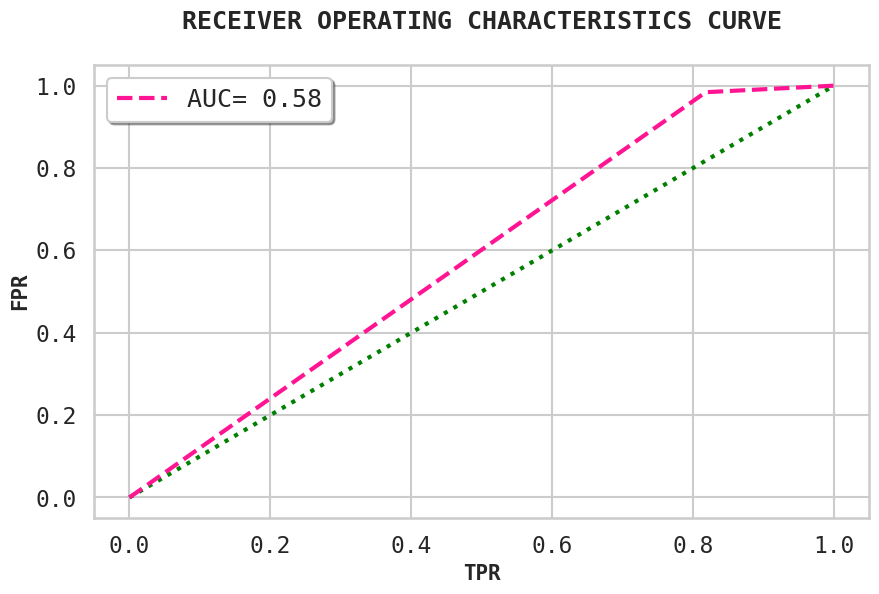



	____________________________________________CONFUSION MATRIX___________________________________________



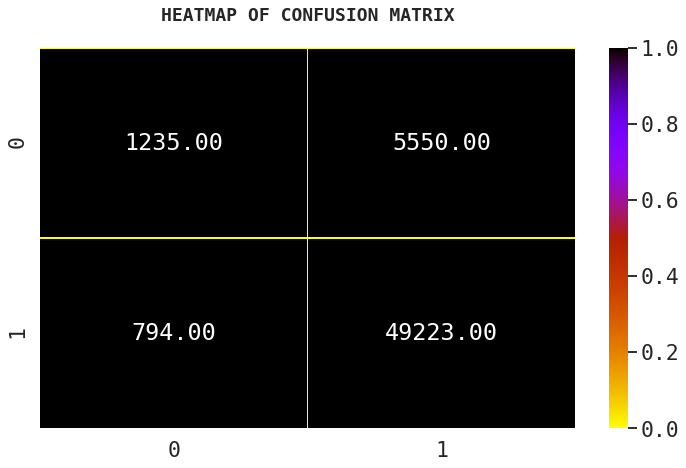


Time elapsed= 8 Min.


In [43]:
logi=LogisticRegression()
acusr(logi,x,y)

In [44]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,x,y,scoring='accuracy',cv=80)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
CV_ACC.append(logi_accuracy.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.8891987036638251


## DECISION TREE CLASSIFIER

In [45]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,15),'min_samples_split':range(2,10)}
dtc_rs=rsv(dtc,dtc_para,cv=90,n_jobs=-1)
dtc_rs.fit(x,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=90, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(4, 15),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']}) 

0.910779094523867 

{'splitter': 'best', 'min_samples_split': 9, 'max_depth': 11, 'criterion': 'entropy'}


In this DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=9) 

The best suited RANDOM SCORE= 82 

ACCURACY SCORE: 0.9119749304601951

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.70      0.39      0.51      6785
           1       0.92      0.98      0.95     50017

    accuracy                           0.91     56802
   macro avg       0.81      0.69      0.73     56802
weighted avg       0.90      0.91      0.90     56802


CONFUSION MATRIX:
 [[ 2675  4110]
 [ 1123 48894]]

PRECISION:
 0.9224586823635952

RECALL:
 0.9775476338045065

MEAN SQUARED ERROR:
 0.09212703778035984

ROOT MEAN SQ. ERROR:
 0.30352436109867664

AUC_ROC Score:
 0.6858998301668073

TPR: [0.         0.60574797 1.        ] 
FPR: [0.         0.97754763 1.        ]


	____________________________________________ROC_AUC CURVE_______________________________________________



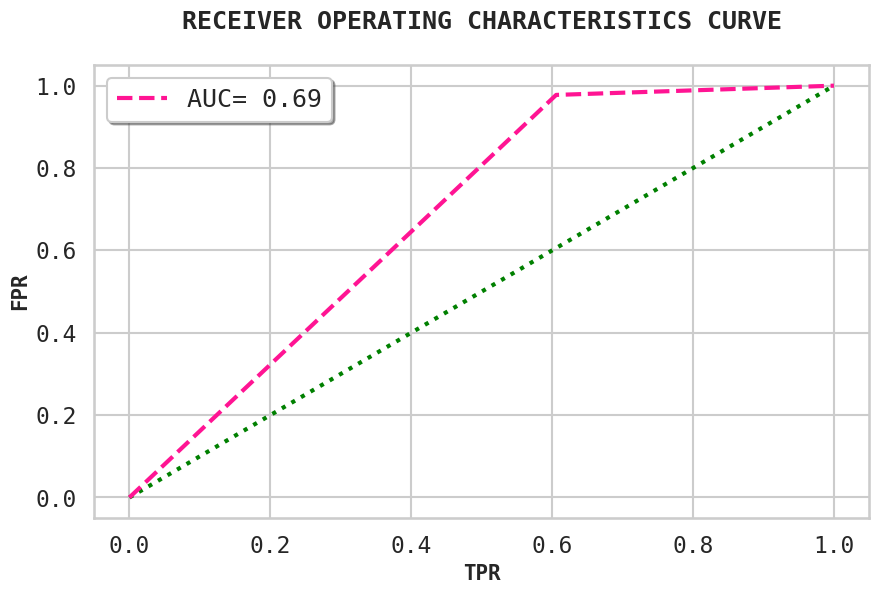



	____________________________________________CONFUSION MATRIX___________________________________________



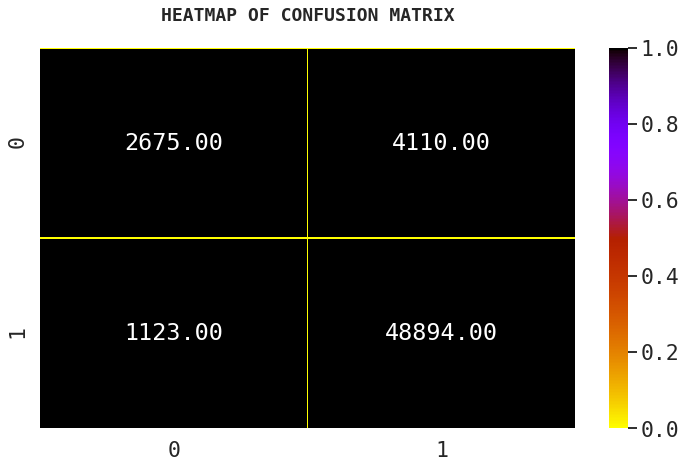


Time elapsed= 15 Min.


In [46]:
dtc=DecisionTreeClassifier(splitter='best',min_samples_split=9,max_depth=11,criterion='entropy')
acusr(dtc,x,y)

In [47]:
#using cross_val_score to check for over/under fitting of DTC model

dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=80)

print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())

CV_ACC.append(dtc_accuracy.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.910911071274116


## GAUSSIAN NB

In this GaussianNB() 

The best suited RANDOM SCORE= 84 

ACCURACY SCORE: 0.7972782648498292

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.32      0.67      0.44      6785
           1       0.95      0.81      0.87     50017

    accuracy                           0.79     56802
   macro avg       0.63      0.74      0.65     56802
weighted avg       0.87      0.79      0.82     56802


CONFUSION MATRIX:
 [[ 4569  2216]
 [ 9645 40372]]

PRECISION:
 0.9479665633511787

RECALL:
 0.8071655637083391

MEAN SQUARED ERROR:
 0.20881306996232527

ROOT MEAN SQ. ERROR:
 0.45696068754579455

AUC_ROC Score:
 0.7402813817067856

TPR: [0.        0.3266028 1.       ] 
FPR: [0.         0.80716556 1.        ]


	____________________________________________ROC_AUC CURVE_______________________________________________



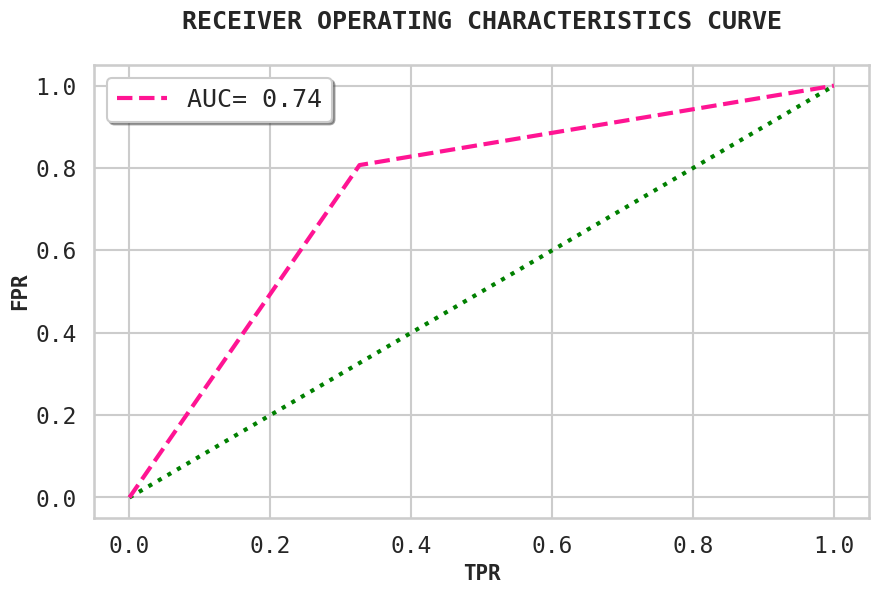



	____________________________________________CONFUSION MATRIX___________________________________________



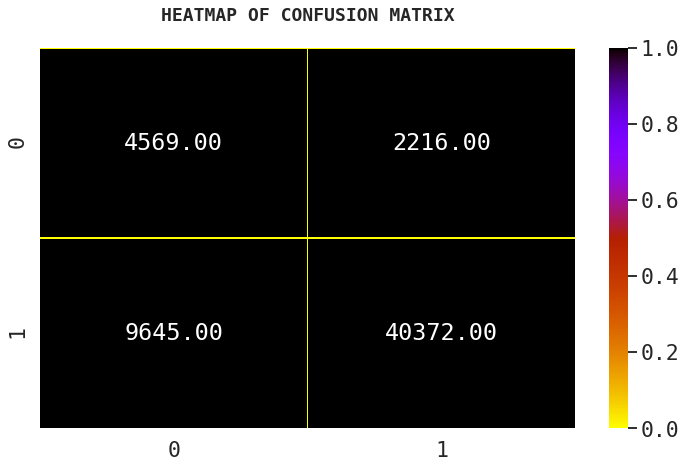


Time elapsed= 0 Min.


In [48]:
gnb=GaussianNB()
acusr(gnb,x,y)

In [49]:
gnb_accuracy=cvs(gnb,x,y,scoring='accuracy',cv=20)

print('THE ACCURACY SCORE AT GNB MODEL IS=', gnb_accuracy.mean())
CV_ACC.append(gnb_accuracy.mean())

THE ACCURACY SCORE AT GNB MODEL IS= 0.7928900319414393


## RANDOM FOREST CLASSIFIER

In [50]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[300,350,400],'max_depth':[3,6,9],'criterion':['gini','entropy']}
rfc_rsv=rsv(rfc,rfc_para,cv=30,n_jobs=-1)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=30, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [300, 350, 400]})

best score= 0.909126004969696

best parameters for RFC=
 {'n_estimators': 300, 'max_depth': 9, 'criterion': 'gini'}


In this RandomForestClassifier(max_depth=9, n_estimators=300, n_jobs=-1) 

The best suited RANDOM SCORE= 123 

ACCURACY SCORE: 0.9128551811555932

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.86      0.28      0.42      6785
           1       0.91      0.99      0.95     50017

    accuracy                           0.91     56802
   macro avg       0.89      0.64      0.68     56802
weighted avg       0.90      0.91      0.89     56802


CONFUSION MATRIX:
 [[ 1877  4908]
 [  304 49713]]

PRECISION:
 0.9101444499368375

RECALL:
 0.9939220664973909

MEAN SQUARED ERROR:
 0.09175733248829267

ROOT MEAN SQ. ERROR:
 0.3029147280808457

AUC_ROC Score:
 0.6352808563879733

TPR: [0.         0.72336035 1.        ] 
FPR: [0.         0.99392207 1.        ]


	____________________________________________ROC_AUC CURVE_______________________________________________



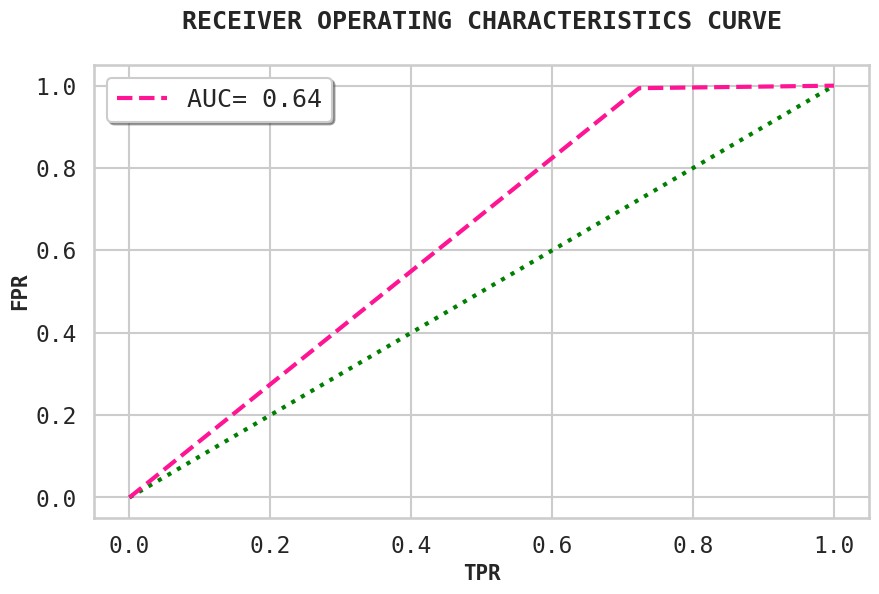



	____________________________________________CONFUSION MATRIX___________________________________________



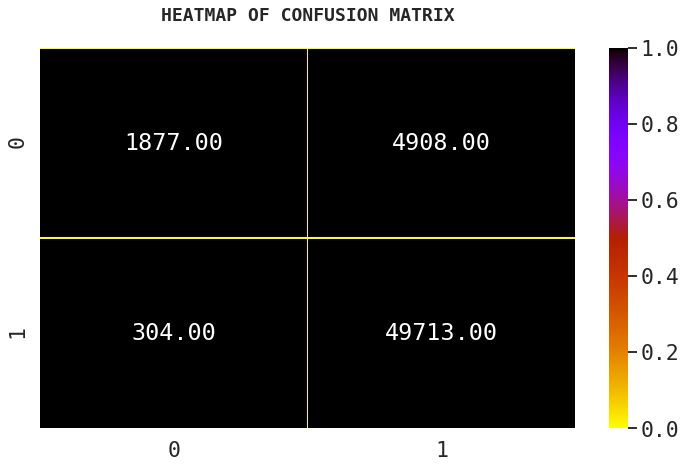


Time elapsed= 33 Min.


In [51]:
rfc=RandomForestClassifier(n_estimators=300,max_depth=9,criterion='gini',n_jobs=-1)
acusr(rfc,x,y)

In [52]:
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=20)

print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
CV_ACC.append(rfc_accuracy.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 0.9089094238438008


## XGBOOST CLASSIFIER

In this XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

The best suited RANDOM SCORE= 123 

ACCURACY SCORE: 0.9191753811485511

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.76      0.43      0.55      6785
           1       0.93      0.98      0.95     50017

    accuracy                           0.92     56802
   macro avg       0.84      0.70      0.75     56802
weighted avg       0.91      0.92      0

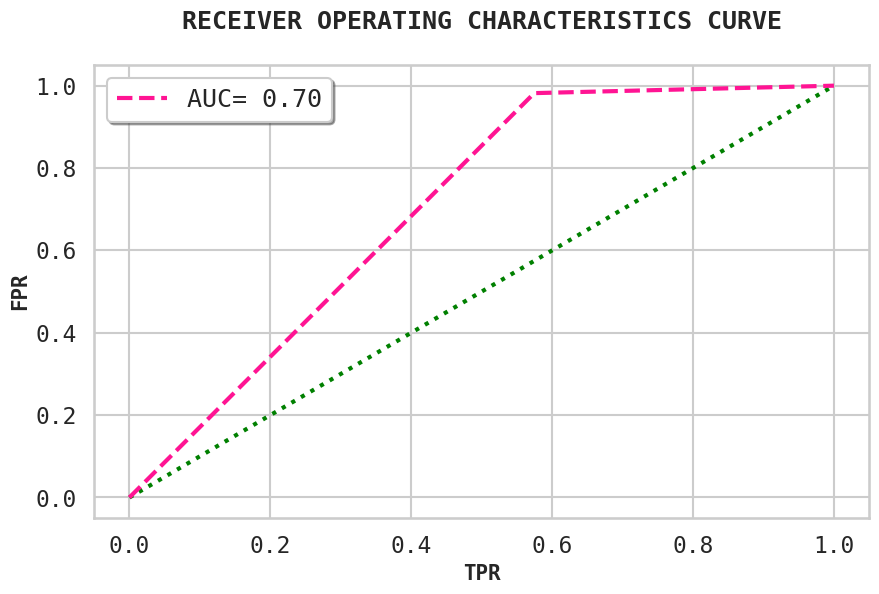



	____________________________________________CONFUSION MATRIX___________________________________________



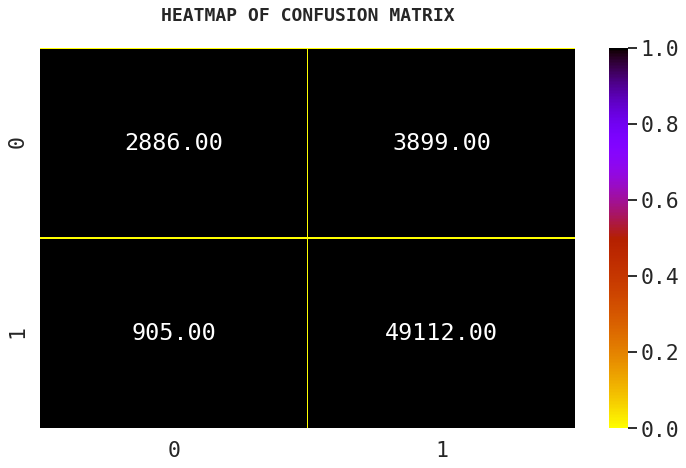


Time elapsed= 9 Min.


In [56]:
XGB = XGBClassifier()
acusr(XGB,x,y)

In [57]:

XGB_accuracy=cvs(XGB,x,y,scoring='accuracy',cv=30)

print('THE ACCURACY SCORE AT XGB MODEL IS=', XGB_accuracy.mean())
CV_ACC.append(XGB_accuracy.mean())

THE ACCURACY SCORE AT XGB MODEL IS= 0.9162930365747748


## RESULT

In [58]:
model=["LOGISTIC",'DTC','GAUSSIAN-NB','RANDOM FOREST','XGBOOST']
results = pd.DataFrame({"MODEL":model,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'TPR':TPR,'FPR':FPR,"CV_ACCURACY":CV_ACC})
                               
                                
            
results.style.set_properties(**{'background-color':'midnightblue','color': 'gold','border-color': 'darkorange'})                               

## SAVING 

**`From the above dataframe it can be seen that Accuracy of XGBOOST Algorithm is higher as compared to other algorithms so selecting it as the final model`**

In [59]:
XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
joblib.dump(XGB,'MFI.obj')

['MFI.obj']